In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
df = pd.read_csv('D:/College/sem 7/final year project/gith/AniSearch/anime.csv')
df = df.reset_index()
df.head()

index  Anime-PlanetID                                           Name  \
0      0              10                           The Prince of Tennis   
1      1             100                        Neon Genesis Evangelion   
2      2            1000              Full Metal Panic! The Second Raid   
3      3           10000                 22/7: Shampoo no Nioi ga Shita   
4      4           10001  Oshiri Tantei: Puputto Fumutto Kaiketsu Dance   

       Alternative Name Rating Score Number Votes  \
0   Tennis no Ouji-sama        4.037        10889   
1  Shinseiki Evangelion        4.248        54463   
2               Unknown         4.35        23948   
3               Unknown          2.8          131   
4               Unknown        1.271           21   

                                                Tags  \
0  Comedy, Drama, Shounen, Sports, Tennis, Based ...   
1  Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Lone...   
2  Action, Comedy, Mecha, Sci Fi, Shounen, Milita...   
3                   Idols, School Life, CG Animation   
4                                    Family Friendly   

                                     Content Warning   Type Episodes  \
0                                            Unknown     TV      178   
1  Emotional Abuse, Explicit Violence, Mature The...     TV       26   
2                          Explicit Violence, Nudity     TV       13   
3                                            Unknown  Music        1   
4                                            Unknown    Web        1   

   Finished Duration StartYear EndYear       Season  \
0      True  Unknown      2001    2005    Fall 2001   
1      True  Unknown      1995    1996    Fall 1995   
2      True  Unknown      2005    2005  Summer 2005   
3      True        5      2018    2018      Unknown   
4      True        2      2017    2017      Unknown   

                        Studios  \
0    Production I.G, Trans Arts   
1  GAINAX, Tatsunoko Production   
2               Kyoto Animation   
3                       Unknown   
4                Toei Animation   

                                            Synopsis  \
0  Meet Ryoma Echizen, the cocky prince of tennis...   
1  In the future, a devastating event known as Se...   
2  Half a year has passed since Sousuke Sagara to...   
3  The idol group 22/7 perform the song Shampoo n...   
4                 No synopsis yet - check back soon!   

                                                 Url  
0  https://www.anime-planet.com/anime/the-prince-...  
1  https://www.anime-planet.com/anime/neon-genesi...  
2  https://www.anime-planet.com/anime/full-metal-...  
3  https://www.anime-planet.com/anime/22-7-shampo...  
4  https://www.anime-planet.com/anime/oshiri-tant...

In [14]:
df.columns

Index(['index', 'Anime-PlanetID', 'Name', 'Alternative Name', 'Rating Score',
       'Number Votes', 'Tags', 'Content Warning', 'Type', 'Episodes',
       'Finished', 'Duration', 'StartYear', 'EndYear', 'Season', 'Studios',
       'Synopsis', 'Url'],
      dtype='object')

### Plotting top 10 anime of all time (based on Rating-Score)

In [15]:
features = ['Rating Score','Number Votes','Studios','Synopsis', 'Tags', 'Episodes']

In [16]:
def combined_features(row):
    return str(row["Rating Score"])+" "+ str(row["Number Votes"])+" "+ str(row["Studios"])+" "+ str(row["Synopsis"])+" "+ str(row["Tags"])+" "+ str(row["Episodes"])+" "

def get_title_from_index(index):
    return df[df["index"] == index]["Name"].values[0]
def get_index_from_title(title):
    return df[df["Name"] == title]["index"].values[0]

In [17]:
df["combined_feature"]=df.apply(combined_features,axis=1)
df["combined_feature"].head()

0    4.037 10889 Production I.G, Trans Arts Meet Ry...
1    4.248 54463 GAINAX, Tatsunoko Production In th...
2    4.35 23948 Kyoto Animation Half a year has pas...
3    2.8 131 Unknown The idol group 22/7 perform th...
4    1.271 21 Toei Animation No synopsis yet - chec...
Name: combined_feature, dtype: object

In [18]:
cv = CountVectorizer()
count_matrix=cv.fit_transform(df["combined_feature"])

In [19]:
anime_liked = "naruto"


In [20]:
cosine_sim = cosine_similarity(count_matrix)
from difflib import get_close_matches


def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
    similar_anime = list(enumerate(liked_movie_index))
    similar_anime.sort(key=lambda row: row[1], reverse=True)
    for i in range(15):
        print(get_title_from_index(similar_anime[i][0]))
except Exception as e:
    print(f"Error: {e}")


naruto
naruto shippuden movie 3: the will of fire
lupin iii special 1: bye bye, lady liberty
naruto special 2: battle at hidden falls. i am the hero!
naruto spin-off: rock lee & his ninja pals
berserk
naruto shippuden
flame of recca
naruto shippuden movie 5: blood prison
naruto shippuden movie 1
shounen onmyouji
black lagoon
nura: rise of the youkai clan
radiant
the dagger of kamui


In [21]:
from difflib import get_close_matches
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Load and clean data
df['Tags'] = df['Tags'].fillna('')
df['Studios'] = df['Studios'].fillna('')
df['Type'] = df['Type'].fillna('Unknown')
df['Synopsis'] = df['Synopsis'].fillna('')
df['Rating Score'] = pd.to_numeric(df['Rating Score'], errors='coerce')
df['Number Votes'] = pd.to_numeric(df['Number Votes'], errors='coerce').fillna(0)

# Preprocessing
scaler = StandardScaler()
scaled_votes = scaler.fit_transform(df[['Number Votes']])

tag_vectorizer = TfidfVectorizer(stop_words='english', max_features=600)
tag_matrix = tag_vectorizer.fit_transform(df['Tags']).toarray()

synopsis_vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)
synopsis_matrix = synopsis_vectorizer.fit_transform(df['Synopsis']).toarray()

encoder = OneHotEncoder()
studios_encoded = encoder.fit_transform(df[['Studios']]).toarray()
type_encoded = encoder.fit_transform(df[['Type']]).toarray()



# Recommendation helper functions
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

def get_title_from_index(index):
    return df[df.index == index]["Name"].values[0]

# Example recommendation (requires cosine_sim to be defined elsewhere)
try:
    # anime_liked = "Naruto"  # Example input
    liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
    similar_anime = list(enumerate(liked_movie_index))
    similar_anime.sort(key=lambda row: row[1], reverse=True)

    print(f"\nRecommendations for {anime_liked} (Cosine Similarity):")
    for i in range(15):
        print(get_title_from_index(similar_anime[i][0]))
except Exception as e:
    print(f"Error: {e}")


features_combined = np.hstack([scaled_votes, tag_matrix, synopsis_matrix, studios_encoded, type_encoded])
print("Feature matrix shape:", features_combined.shape)


Recommendations for naruto (Cosine Similarity):
naruto
naruto shippuden movie 3: the will of fire
lupin iii special 1: bye bye, lady liberty
naruto special 2: battle at hidden falls. i am the hero!
naruto spin-off: rock lee & his ninja pals
berserk
naruto shippuden
flame of recca
naruto shippuden movie 5: blood prison
naruto shippuden movie 1
shounen onmyouji
black lagoon
nura: rise of the youkai clan
radiant
the dagger of kamui
Feature matrix shape: (16621, 3153)


In [22]:
features_combined = np.hstack([scaled_votes, tag_matrix, synopsis_matrix, studios_encoded, type_encoded])

print("Feature matrix shape:", features_combined.shape)

Feature matrix shape: (16621, 3153)


In [23]:
cosine_sim = cosine_similarity(count_matrix)
from difflib import get_close_matches


def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
    similar_anime = list(enumerate(liked_movie_index))
    similar_anime.sort(key=lambda row: row[1], reverse=True)
    for i in range(15):
        print(get_title_from_index(similar_anime[i][0]))
except Exception as e:
    print(f"Error: {e}")


naruto
naruto shippuden movie 3: the will of fire
lupin iii special 1: bye bye, lady liberty
naruto special 2: battle at hidden falls. i am the hero!
naruto spin-off: rock lee & his ninja pals
berserk
naruto shippuden
flame of recca
naruto shippuden movie 5: blood prison
naruto shippuden movie 1
shounen onmyouji
black lagoon
nura: rise of the youkai clan
radiant
the dagger of kamui


#### Recommendation using Cosine Similarity

In [15]:
# from difflib import get_close_matches
# from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error
# from sklearn.model_selection import train_test_split
# import numpy as np
# import pandas as pd

# def get_index_from_title(title):
#     title = title.strip().lower()
#     df["Name"] = df["Name"].str.strip().str.lower()
#     matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
#     if matches:
#         title = matches[0]  
#         return df[df["Name"] == title]["index"].values[0]
#     else:
#         raise ValueError(f"No close matches found for '{title}'.")

# df['Rating Score'] = pd.to_numeric(df['Rating Score'], errors='coerce')
# df['Number Votes'] = pd.to_numeric(df['Number Votes'], errors='coerce')

# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# try:
    
#     y_true = []
#     y_pred = []
#     mae_scores = []
    
#     for idx, row in test_df.iterrows():
#         true_rating = row['Rating Score']
#         anime_name = row['Name']
        
#         liked_movie_index = cosine_sim[get_index_from_title(anime_name)]
#         similar_anime = list(enumerate(liked_movie_index))
#         similar_anime.sort(key=lambda x: x[1], reverse=True)
        
#         recommended_indices = [x[0] for x in similar_anime[1:31]]  
        
#         pred_ratings = df.iloc[recommended_indices]['Rating Score'].mean()
        
#         y_true.append(1 if true_rating >= 4.0 else 0)
#         y_pred.append(1 if pred_ratings >= 4.0 else 0)
        
#         mae_scores.append(abs(true_rating - pred_ratings))
        
    
#     precision = precision_score(y_true, y_pred)
#     recall = recall_score(y_true, y_pred)
#     f1 = f1_score(y_true, y_pred)
#     mae = np.mean(mae_scores)
    
#     print(f"\nRecommendations for {anime_liked} (Cosine Similarity):")
#     liked_movie_index = cosine_sim[get_index_from_title(anime_liked)]
#     similar_anime = list(enumerate(liked_movie_index))
#     similar_anime.sort(key=lambda row: row[1], reverse=True)
#     for i in range(15):
#         print(get_title_from_index(similar_anime[i][0]))
        
#     print("\n")
#     print()
    
#     print(f"Precision: {precision:.3f}")
#     print(f"Recall: {recall:.3f}")
#     print(f"F1 Score: {f1:.3f}")
#     print(f"Mean Absolute Error: {mae:.3f}")
    
        
# except Exception as e:
#     print(f"Error: {e}")


In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Fill NaN values with empty strings
df['Tags'] = df['Tags'].fillna('')
df['Studios'] = df['Studios'].fillna('')
df['Type'] = df['Type'].fillna('Unknown')
df['Synopsis'] = df['Synopsis'].fillna('')  # Ensure no NaN values in synopsis

# Convert 'Number Votes' to numeric and scale it
df['Number Votes'] = pd.to_numeric(df['Number Votes'], errors='coerce').fillna(0)
scaler = StandardScaler()
scaled_votes = scaler.fit_transform(df[['Number Votes']])

# TF-IDF Vectorization for Tags
tag_vectorizer = TfidfVectorizer(stop_words='english', max_features=600)
tag_matrix = tag_vectorizer.fit_transform(df['Tags']).toarray()

# TF-IDF Vectorization for Synopsis
synopsis_vectorizer = TfidfVectorizer(stop_words='english', max_features=1500)  # More features for better representation
synopsis_matrix = synopsis_vectorizer.fit_transform(df['Synopsis']).toarray()

# One-Hot Encoding for Studios and Type
encoder = OneHotEncoder()
studios_encoded = encoder.fit_transform(df[['Studios']]).toarray()
type_encoded = encoder.fit_transform(df[['Type']]).toarray()

# Combine all features
features_combined = np.hstack([scaled_votes, tag_matrix, synopsis_matrix, studios_encoded, type_encoded])

print("Feature matrix shape:", features_combined.shape)


Feature matrix shape: (16621, 3153)


#### Recommendation using k-Means

In [17]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error

# # Perform KMeans
# kmeans = KMeans(n_clusters=20, random_state=42)
# clusters = kmeans.fit_predict(features_combined)

# df['KMeans_Cluster'] = clusters

# def recommend_anime_kmeans(title, top_n=10):
#     anime_index = get_index_from_title(title)
#     anime_cluster = df.loc[anime_index, 'KMeans_Cluster']
    
#     similar_anime = df[df['KMeans_Cluster'] == anime_cluster]
    
#     recommended_anime = similar_anime[similar_anime['Name'] != title].head(top_n)['Name'].values
#     return recommended_anime

# recommended_anime_kmeans = recommend_anime_kmeans(anime_liked)
# print(f"Anime similar to '{anime_liked}' based on KMeans clustering:")
# for anime in recommended_anime_kmeans:
#     print(anime)

# true_labels = (df['KMeans_Cluster'] == df.loc[get_index_from_title(anime_liked), 'KMeans_Cluster']).astype(int)
# pred_labels = np.zeros(len(df))
# recommended_indices = [get_index_from_title(anime) for anime in recommended_anime_kmeans]
# pred_labels[recommended_indices] = 1

# precision = precision_score(true_labels, pred_labels)
# recall = recall_score(true_labels, pred_labels)
# f1 = f1_score(true_labels, pred_labels)
# df['Rating Score'] = pd.to_numeric(df['Rating Score'].replace('Unknown', np.nan), errors='coerce')
# df['Rating Score'] = df['Rating Score'].fillna(df['Rating Score'].mean())

# true_ratings = df['Rating Score'].values
# pred_ratings = np.zeros(len(df))
# pred_ratings[recommended_indices] = df.loc[get_index_from_title(anime_liked), 'Rating Score']
# mae = mean_absolute_error(true_ratings, pred_ratings)

# print("\nMetrics:")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}")
# print(f"F1 Score: {f1:.3f}")
# print(f"Mean Absolute Error: {mae:.3f}")


#### Recommendation using KNN

In [18]:
# from sklearn.neighbors import NearestNeighbors
# from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error

# knn = NearestNeighbors(n_neighbors=11, metric='cosine')  
# knn.fit(features_combined)

# # Function to recommend based on KNN
# def recommend_anime_knn(title, top_n=10):
#     anime_index = get_index_from_title(title)
    
#     distances, indices = knn.kneighbors(features_combined[anime_index].reshape(1, -1))
    
#     recommended_anime = df.iloc[indices[0][1:top_n+1]]['Name'].values
#     return recommended_anime

# recommended_anime_knn = recommend_anime_knn(anime_liked)
# print(f"Anime similar to '{anime_liked}' based on KNN:")
# for anime in recommended_anime_knn:
#     print(anime)




##### KNN using Cosine-Sim (without normalization)

In [19]:
cosine_sim = cosine_similarity(count_matrix)
from difflib import get_close_matches

def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = get_index_from_title(anime_liked)
    similarity_scores = cosine_sim[liked_movie_index] 
    # Get similarity scores for the liked anime
    similar_anime = list(enumerate(similarity_scores)) 
    similar_anime.sort(key=lambda row: row[1], reverse=True)  # Sort by similarity score (highest first)

    print(f"Anime similar to '{anime_liked}' based on Cosine Similarity:\n")

    max_name_length = max(len(get_title_from_index(anime[0])) for anime in similar_anime[:15])  # Find longest name

    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        similarity_score = similar_anime[i][1]
        distance = 1 - similarity_score  # Cosine distance

        print(f"{anime_name.ljust(max_name_length)}  |  Distance: {distance:.4f}  |  Similarity: {similarity_score:.4f}")

except Exception as e:
    print(f"Error: {e}")



Anime similar to 'naruto' based on Cosine Similarity:

makyuu senjou                      |  Distance: -0.0000  |  Similarity: 1.0000
shakugan no shana                  |  Distance: 0.4761  |  Similarity: 0.5239
run melos!                         |  Distance: 0.4794  |  Similarity: 0.5206
shounen onmyouji                   |  Distance: 0.4932  |  Similarity: 0.5068
tokyo revengers                    |  Distance: 0.4935  |  Similarity: 0.5065
ichigo 100%                        |  Distance: 0.4950  |  Similarity: 0.5050
phantom: requiem for the phantom   |  Distance: 0.4963  |  Similarity: 0.5037
kanon (2006)                       |  Distance: 0.4993  |  Similarity: 0.5007
joe vs. joe                        |  Distance: 0.5008  |  Similarity: 0.4992
crying freeman                     |  Distance: 0.5047  |  Similarity: 0.4953
dual! parallel trouble adventures  |  Distance: 0.5066  |  Similarity: 0.4934
berserk                            |  Distance: 0.5073  |  Similarity: 0.4927
princess

In [20]:
cosine_sim = cosine_similarity(count_matrix)
from difflib import get_close_matches

def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = get_index_from_title(anime_liked)
    similarity_scores = cosine_sim[liked_movie_index] 
    min_distance = np.min(similarity_scores)
    max_distance = np.max(similarity_scores)
    # Get similarity scores for the liked anime
    similar_anime = list(enumerate(similarity_scores)) 
    similar_anime.sort(key=lambda row: row[1], reverse=True)  # Sort by similarity score (highest first)

    print(f"Anime similar to '{anime_liked}' based on Cosine Similarity:\n")

    max_name_length = max(len(get_title_from_index(anime[0])) for anime in similar_anime[:15])  # Find longest name

    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        raw_distance = similar_anime[i][1]
        normalized_distance = (raw_distance - min_distance) / (max_distance - min_distance)
        normalized_similarity = 1 - normalized_distance # Cosine distance

        print(f"{anime_name.ljust(max_name_length)}  |  Distance: {normalized_distance:.4f}  |  Similarity: {normalized_similarity:.4f}")

except Exception as e:
    print(f"Error: {e}")



Anime similar to 'naruto' based on Cosine Similarity:

makyuu senjou                      |  Distance: 1.0000  |  Similarity: 0.0000
shakugan no shana                  |  Distance: 0.5239  |  Similarity: 0.4761
run melos!                         |  Distance: 0.5206  |  Similarity: 0.4794
shounen onmyouji                   |  Distance: 0.5068  |  Similarity: 0.4932
tokyo revengers                    |  Distance: 0.5065  |  Similarity: 0.4935
ichigo 100%                        |  Distance: 0.5050  |  Similarity: 0.4950
phantom: requiem for the phantom   |  Distance: 0.5037  |  Similarity: 0.4963
kanon (2006)                       |  Distance: 0.5007  |  Similarity: 0.4993
joe vs. joe                        |  Distance: 0.4992  |  Similarity: 0.5008
crying freeman                     |  Distance: 0.4953  |  Similarity: 0.5047
dual! parallel trouble adventures  |  Distance: 0.4934  |  Similarity: 0.5066
berserk                            |  Distance: 0.4927  |  Similarity: 0.5073
princess 

##### KNN using Manhattan (without normalization)

In [21]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches

def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = get_index_from_title(anime_liked)
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='cityblock').flatten()
    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower Manhattan distance means higher similarity

    print(f"Anime similar to '{anime_liked}' based on Manhattan Distance:\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        distance = similar_anime[i][1]
        similarity_score = 1 / (1 + distance)  # Convert distance to similarity (closer = higher similarity)
        print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

except Exception as e:
    print(f"Error: {e}")


Anime similar to 'naruto' based on Manhattan Distance:

makyuu senjou - 		Distance: 0.0000, 		Similarity: 1.0000
zettai muteki raijin oh (1992) - 		Distance: 9.1630, 		Similarity: 0.0984
bokutachi no peace river - 		Distance: 9.9830, 		Similarity: 0.0910
blue seed 1.5 - 		Distance: 10.4880, 		Similarity: 0.0870
lupin viii: arsene and cie - 		Distance: 10.5966, 		Similarity: 0.0862
yozakura quartet: tsuki ni naku - 		Distance: 10.6095, 		Similarity: 0.0861
kumo ni noru - 		Distance: 10.6435, 		Similarity: 0.0859
devilman: memorial - 		Distance: 10.7110, 		Similarity: 0.0854
ultraman: chou toushi gekiden - suisei senjin tsuifon toujou - 		Distance: 10.7140, 		Similarity: 0.0854
yozakura quartet: hoshi no umi - 		Distance: 10.7214, 		Similarity: 0.0853
katsugeki shoujo tanteidan - 		Distance: 10.7363, 		Similarity: 0.0852
licca-chan no nichiyoubi - 		Distance: 10.7950, 		Similarity: 0.0848
detective conan: the internet - the mysterious e-mail case - 		Distance: 10.8880, 		Similarity: 0.08

##### KNN using Manhattan (with normalization)

In [22]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np

def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)  
    if matches:
        title = matches[0]  
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    # Compute Manhattan (Cityblock) Distance for all anime
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='cityblock').flatten()
    
    # Find Min & Max for Normalization
    min_distance = np.min(similarity_scores)
    max_distance = np.max(similarity_scores)

    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower Manhattan distance means higher similarity

    print(f"Anime similar to '{anime_liked}' based on Normalized Manhattan Distance:\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        raw_distance = similar_anime[i][1]
        normalized_distance = (raw_distance - min_distance) / (max_distance - min_distance)
        normalized_similarity = 1 - normalized_distance

        print(f"{anime_name} - \t\tDistance: {normalized_distance:.4f}, \t\tSimilarity: {normalized_similarity:.4f}")

except Exception as e:
    print(f"Error: {e}")


Anime similar to 'naruto' based on Normalized Manhattan Distance:

makyuu senjou - 		Distance: 0.0000, 		Similarity: 1.0000
zettai muteki raijin oh (1992) - 		Distance: 0.2122, 		Similarity: 0.7878
bokutachi no peace river - 		Distance: 0.2312, 		Similarity: 0.7688
blue seed 1.5 - 		Distance: 0.2429, 		Similarity: 0.7571
lupin viii: arsene and cie - 		Distance: 0.2454, 		Similarity: 0.7546
yozakura quartet: tsuki ni naku - 		Distance: 0.2457, 		Similarity: 0.7543
kumo ni noru - 		Distance: 0.2465, 		Similarity: 0.7535
devilman: memorial - 		Distance: 0.2480, 		Similarity: 0.7520
ultraman: chou toushi gekiden - suisei senjin tsuifon toujou - 		Distance: 0.2481, 		Similarity: 0.7519
yozakura quartet: hoshi no umi - 		Distance: 0.2483, 		Similarity: 0.7517
katsugeki shoujo tanteidan - 		Distance: 0.2486, 		Similarity: 0.7514
licca-chan no nichiyoubi - 		Distance: 0.2500, 		Similarity: 0.7500
detective conan: the internet - the mysterious e-mail case - 		Distance: 0.2521, 		Similarity: 0.7

##### KNN using Euclidean (without normalization)

In [23]:
from scipy.spatial.distance import cdist

try:
    liked_movie_index = get_index_from_title(anime_liked)
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='euclidean').flatten()
    # Find Min & Max for Normalization
    min_distance = np.min(similarity_scores)
    max_distance = np.max(similarity_scores)

    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower Euclidean distance means higher similarity

    print(f"Anime similar to '{anime_liked}' based on Euclidean Distance:\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        distance = similar_anime[i][1]
        similarity_score = 1 / (1 + distance)
        print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

except Exception as e:
    print(f"Error: {e}")


Anime similar to 'naruto' based on Euclidean Distance:

makyuu senjou - 		Distance: 0.0000, 		Similarity: 1.0000
california crisis: gun salvo - 		Distance: 2.1683, 		Similarity: 0.3156
bokutachi no peace river - 		Distance: 2.1795, 		Similarity: 0.3145
landlock - 		Distance: 2.1983, 		Similarity: 0.3127
devilman: memorial - 		Distance: 2.2103, 		Similarity: 0.3115
cleopatra d.c. - 		Distance: 2.2139, 		Similarity: 0.3111
zettai muteki raijin oh (1992) - 		Distance: 2.2361, 		Similarity: 0.3090
blue seed beyond - 		Distance: 2.2417, 		Similarity: 0.3085
cipher - 		Distance: 2.2483, 		Similarity: 0.3079
di gi charat natsuyasumi special - 		Distance: 2.2584, 		Similarity: 0.3069
yozakura quartet: tsuki ni naku - 		Distance: 2.2762, 		Similarity: 0.3052
the hard: bounty hunter - 		Distance: 2.2809, 		Similarity: 0.3048
gatekeepers 21 - 		Distance: 2.2823, 		Similarity: 0.3047
yozakura quartet: hoshi no umi - 		Distance: 2.2829, 		Similarity: 0.3046
project a-ko: uncivil wars - 		Distance: 

##### KNN using Euclidean (with normalization)

In [24]:
from scipy.spatial.distance import cdist

try:
    liked_movie_index = get_index_from_title(anime_liked)
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='euclidean').flatten()
    # Find Min & Max for Normalization
    min_distance = np.min(similarity_scores)
    max_distance = np.max(similarity_scores)

    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower Euclidean distance means higher similarity

    print(f"Anime similar to '{anime_liked}' based on Euclidean Distance:\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        raw_distance = similar_anime[i][1]
        normalized_distance = (raw_distance - min_distance) / (max_distance - min_distance)
        normalized_similarity = 1 - normalized_distance
        print(f"{anime_name} - \t\tDistance: {normalized_distance:.4f}, \t\tSimilarity: {normalized_similarity:.4f}")

except Exception as e:
    print(f"Error: {e}")


Anime similar to 'naruto' based on Euclidean Distance:

makyuu senjou - 		Distance: 0.0000, 		Similarity: 1.0000
california crisis: gun salvo - 		Distance: 0.0899, 		Similarity: 0.9101
bokutachi no peace river - 		Distance: 0.0904, 		Similarity: 0.9096
landlock - 		Distance: 0.0912, 		Similarity: 0.9088
devilman: memorial - 		Distance: 0.0917, 		Similarity: 0.9083
cleopatra d.c. - 		Distance: 0.0918, 		Similarity: 0.9082
zettai muteki raijin oh (1992) - 		Distance: 0.0927, 		Similarity: 0.9073
blue seed beyond - 		Distance: 0.0930, 		Similarity: 0.9070
cipher - 		Distance: 0.0932, 		Similarity: 0.9068
di gi charat natsuyasumi special - 		Distance: 0.0937, 		Similarity: 0.9063
yozakura quartet: tsuki ni naku - 		Distance: 0.0944, 		Similarity: 0.9056
the hard: bounty hunter - 		Distance: 0.0946, 		Similarity: 0.9054
gatekeepers 21 - 		Distance: 0.0946, 		Similarity: 0.9054
yozakura quartet: hoshi no umi - 		Distance: 0.0947, 		Similarity: 0.9053
project a-ko: uncivil wars - 		Distance: 

##### KNN using minkowski (without normalization)

In [25]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np

# Function to get index of an anime from its title
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")

try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    # Compute Minkowski Distance for all anime (p=3)
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=3).flatten()
    
    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower distance means higher similarity
    
    print(f"Anime similar to '{anime_liked}' based on Minkowski Distance (p=3):\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        distance = similar_anime[i][1]
        similarity_score = 1 / (1 + distance)  # Convert distance to similarity
        print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

except Exception as e:
    print(f"Error: {e}")




Anime similar to 'naruto' based on Minkowski Distance (p=3):

makyuu senjou - 		Distance: 0.0000, 		Similarity: 1.0000
california crisis: gun salvo - 		Distance: 1.4158, 		Similarity: 0.4139
di gi charat natsuyasumi special - 		Distance: 1.4303, 		Similarity: 0.4115
cleopatra d.c. - 		Distance: 1.4376, 		Similarity: 0.4102
cipher - 		Distance: 1.4548, 		Similarity: 0.4074
sakura wars: new york ny. - 		Distance: 1.4602, 		Similarity: 0.4065
early reins - 		Distance: 1.4680, 		Similarity: 0.4052
riding bean - 		Distance: 1.4701, 		Similarity: 0.4048
kaleido star: legend of phoenix ~layla hamilton story~ - 		Distance: 1.4725, 		Similarity: 0.4044
landlock - 		Distance: 1.4726, 		Similarity: 0.4044
the hard: bounty hunter - 		Distance: 1.4726, 		Similarity: 0.4044
supernatural the animation - 		Distance: 1.4730, 		Similarity: 0.4044
blue seed beyond - 		Distance: 1.4757, 		Similarity: 0.4039
kaleido star: it's good! goood!! - 		Distance: 1.4781, 		Similarity: 0.4035
bokutachi no peace rive

##### KNN using minkowski (with normalization)

In [26]:
from scipy.spatial.distance import cdist
from difflib import get_close_matches
import numpy as np

# Function to get index of an anime from its title
def get_index_from_title(title):
    title = title.strip().lower()
    df["Name"] = df["Name"].str.strip().str.lower()
    matches = get_close_matches(title, df["Name"], n=1, cutoff=0.8)
    if matches:
        title = matches[0]
        return df[df["Name"] == title]["index"].values[0]
    else:
        raise ValueError(f"No close matches found for '{title}'.")
# With Normalization
try:
    liked_movie_index = get_index_from_title(anime_liked)
    
    # Compute Minkowski Distance for all anime (p=3)
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='minkowski', p=3).flatten()
    
    # Find Min & Max for Normalization
    min_distance = np.min(similarity_scores)
    max_distance = np.max(similarity_scores)
    
    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower distance means higher similarity
    
    print(f"Anime similar to '{anime_liked}' based on Normalized Minkowski Distance (p=3):\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        raw_distance = similar_anime[i][1]
        normalized_distance = (raw_distance - min_distance) / (max_distance - min_distance)
        normalized_similarity = 1 - normalized_distance
        print(f"{anime_name} - \t\tDistance: {normalized_distance:.4f}, \t\tSimilarity: {normalized_similarity:.4f}")

except Exception as e:
    print(f"Error: {e}")

Anime similar to 'naruto' based on Normalized Minkowski Distance (p=3):

makyuu senjou - 		Distance: 0.0000, 		Similarity: 1.0000
california crisis: gun salvo - 		Distance: 0.0591, 		Similarity: 0.9409
di gi charat natsuyasumi special - 		Distance: 0.0597, 		Similarity: 0.9403
cleopatra d.c. - 		Distance: 0.0600, 		Similarity: 0.9400
cipher - 		Distance: 0.0607, 		Similarity: 0.9393
sakura wars: new york ny. - 		Distance: 0.0610, 		Similarity: 0.9390
early reins - 		Distance: 0.0613, 		Similarity: 0.9387
riding bean - 		Distance: 0.0614, 		Similarity: 0.9386
kaleido star: legend of phoenix ~layla hamilton story~ - 		Distance: 0.0615, 		Similarity: 0.9385
landlock - 		Distance: 0.0615, 		Similarity: 0.9385
the hard: bounty hunter - 		Distance: 0.0615, 		Similarity: 0.9385
supernatural the animation - 		Distance: 0.0615, 		Similarity: 0.9385
blue seed beyond - 		Distance: 0.0616, 		Similarity: 0.9384
kaleido star: it's good! goood!! - 		Distance: 0.0617, 		Similarity: 0.9383
bokutachi no

##### KNN using Hamming (without normalization)

In [27]:
from scipy.spatial.distance import cdist

try:
    liked_movie_index = get_index_from_title(anime_liked)
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='hamming').flatten()
    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower Hamming distance means higher similarity

    print(f"Anime similar to '{anime_liked}' based on Hamming Distance:\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        distance = similar_anime[i][1]
        similarity_score = 1 - distance  # Hamming similarity is (1 - distance)
        print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

except Exception as e:
    print(f"Error: {e}")


Anime similar to 'naruto' based on Hamming Distance:

makyuu senjou - 		Distance: 0.0000, 		Similarity: 1.0000
zettai muteki raijin oh (1992) - 		Distance: 0.0117, 		Similarity: 0.9883
blue seed 1.5 - 		Distance: 0.0123, 		Similarity: 0.9877
detective conan: chase the mysterious comet monster! - 		Distance: 0.0127, 		Similarity: 0.9873
night on the galactic railroad: fantasy railroad in the stars - 		Distance: 0.0127, 		Similarity: 0.9873
tsubiregg tsuburegg march - 		Distance: 0.0127, 		Similarity: 0.9873
detective conan: the internet - the mysterious e-mail case - 		Distance: 0.0127, 		Similarity: 0.9873
gakkou no yuurei - 		Distance: 0.0127, 		Similarity: 0.9873
donguri to yamaneko - 		Distance: 0.0127, 		Similarity: 0.9873
usatalk - 		Distance: 0.0127, 		Similarity: 0.9873
genji - 		Distance: 0.0127, 		Similarity: 0.9873
pops - 		Distance: 0.0127, 		Similarity: 0.9873
kumo ni noru - 		Distance: 0.0127, 		Similarity: 0.9873
hoshigari hime no bouken - 		Distance: 0.0127, 		Similarity

##### KNN using Jaccard (without normalization)

In [28]:
from scipy.spatial.distance import cdist

try:
    liked_movie_index = get_index_from_title(anime_liked)
    similarity_scores = cdist([features_combined[liked_movie_index]], features_combined, metric='jaccard').flatten()
     # Find Min & Max for Normalization
    min_distance = np.min(similarity_scores)
    max_distance = np.max(similarity_scores)
    similar_anime = list(enumerate(similarity_scores))
    similar_anime.sort(key=lambda row: row[1])  # Lower Jaccard distance means higher similarity

    print(f"Anime similar to '{anime_liked}' based on Jaccard Distance:\n")
    for i in range(15):
        anime_name = get_title_from_index(similar_anime[i][0])
        raw_distance = similar_anime[i][1]
        normalized_distance = (raw_distance - min_distance) / (max_distance - min_distance)
        normalized_similarity = 1 - normalized_distance
        print(f"{anime_name} - \t\tDistance: {distance:.4f}, \t\tSimilarity: {similarity_score:.4f}")

except Exception as e:
    print(f"Error: {e}")


Anime similar to 'naruto' based on Jaccard Distance:

makyuu senjou - 		Distance: 0.0127, 		Similarity: 0.9873
prayers - 		Distance: 0.0127, 		Similarity: 0.9873
strait jacket - 		Distance: 0.0127, 		Similarity: 0.9873
iron man: rise of technovore - 		Distance: 0.0127, 		Similarity: 0.9873
gleipnir - 		Distance: 0.0127, 		Similarity: 0.9873
touma kijin den oni - 		Distance: 0.0127, 		Similarity: 0.9873
big order ova - 		Distance: 0.0127, 		Similarity: 0.9873
magical girl pretty sammy - 		Distance: 0.0127, 		Similarity: 0.9873
demonbane ova - 		Distance: 0.0127, 		Similarity: 0.9873
aguu: tensai ningyou - 		Distance: 0.0127, 		Similarity: 0.9873
the world ends with you the animation - 		Distance: 0.0127, 		Similarity: 0.9873
.hack//quantum - 		Distance: 0.0127, 		Similarity: 0.9873
memories off 2nd - 		Distance: 0.0127, 		Similarity: 0.9873
gonna be the twin-tail!! - 		Distance: 0.0127, 		Similarity: 0.9873
mecha-ude - 		Distance: 0.0127, 		Similarity: 0.9873


In [29]:
# import pandas as pd

# # Sample Data (replace this with your actual dataset)
# # df = pd.DataFrame({
# #     'Name': ['Naruto', 'One Piece', 'Attack on Titan', 'Demon Slayer', 'My Hero Academia'],
# #     'Tags': ['Drama, Action, Adventure', 'Action, Adventure', 'Action, Drama', 'Action, Supernatural', 'Action, Drama'],
# #     'Rating Score': [8.5, 9.0, 8.8, 8.7, 8.9]
# # })

# # Preprocess the Tags column: Ensure tags are sorted alphabetically
# data['Tags'] = data['Tags'].fillna('')
# data['Tags'] = data['Tags'].apply(lambda x: ', '.join(sorted(x.split(', '))))  # Sort tags alphabetically

# # Function to recommend anime based on genre/tag
# def recommend_by_genre(genre, top_n=15):
#     # Find anime with the selected tag
#     selected_genre_index = [i for i, tags in enumerate(data['Tags']) if genre in tags]

#     if not selected_genre_index:
#         return f"No anime found with the tag: {genre}"

#     # Filter the recommended anime based on the selected genre
#     recommended_anime = data.iloc[selected_genre_index][['Name', 'Tags', 'Rating Score']]

#     # Sort the recommendations by Rating Score in descending order
#     recommended_anime = recommended_anime.sort_values(by='Rating Score', ascending=False)

#     # Return the top_n recommendations
#     return recommended_anime.head(top_n)

# # User input for genre/tag
# selected_tag = "Action"

# # Get recommendations based on the selected tag
# recommended_anime = recommend_by_genre(selected_tag)

# print("\nRecommended anime sorted by rating (Top 15):")
# print(recommended_anime)


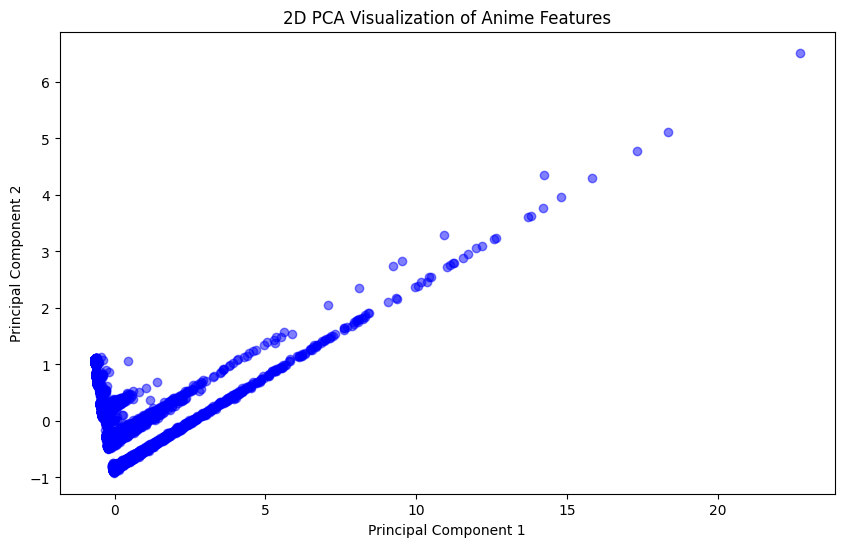

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Plot the transformed data
plt.figure(figsize=(10, 6))
plt.scatter(features_2D[:, 0], features_2D[:, 1], alpha=0.5, c='blue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features")
plt.show()


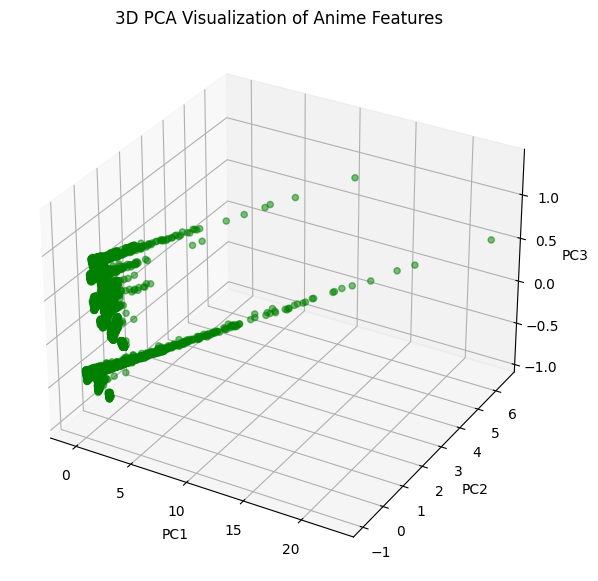

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3D
pca_3d = PCA(n_components=3)
features_3D = pca_3d.fit_transform(features_combined)

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_3D[:, 0], features_3D[:, 1], features_3D[:, 2], alpha=0.5, c='green')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Visualization of Anime Features")
plt.show()


C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


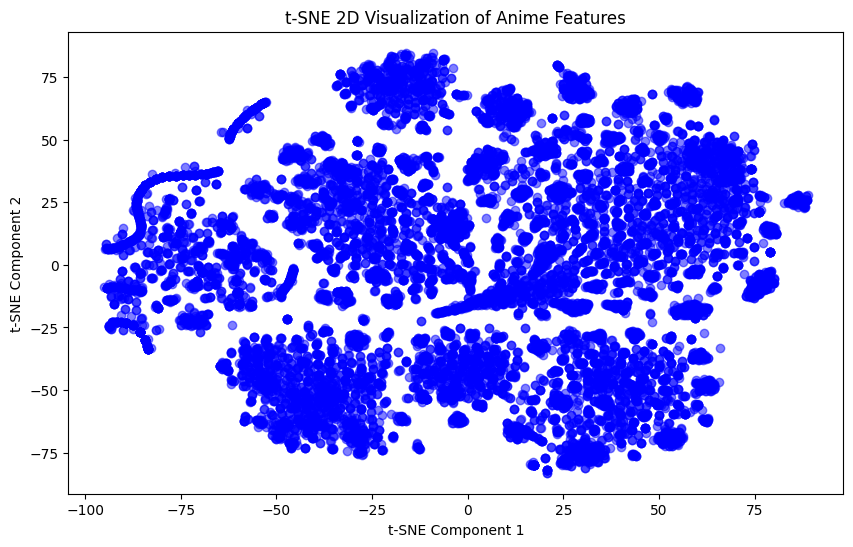

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2D = tsne.fit_transform(features_combined)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(features_2D[:, 0], features_2D[:, 1], alpha=0.5, c='blue')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE 2D Visualization of Anime Features")
plt.show()


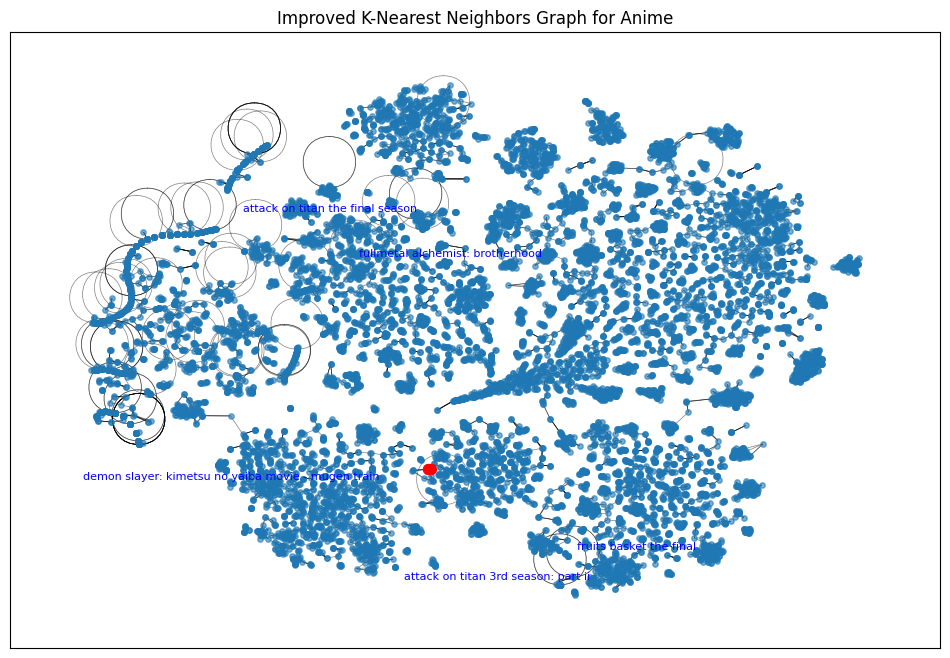

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Fit kNN model
knn = NearestNeighbors(n_neighbors=5, metric="euclidean")
knn.fit(features_2D)

# Get nearest neighbors
distances, indices = knn.kneighbors(features_2D)

# Create a graph
G = nx.Graph()
for i in range(features_2D.shape[0]):
    for j in range(1, 5):  # Connect each point to its 4 nearest neighbors
        G.add_edge(i, indices[i][j], weight=distances[i][j])

# Plot graph
plt.figure(figsize=(12, 8))

# Get positions for graph layout
pos = {i: features_2D[i] for i in range(features_2D.shape[0])}

# Draw nodes (smaller, transparent)
nx.draw_networkx_nodes(G, pos, node_size=15, alpha=0.6)

# Draw edges (lighter, thinner)
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=0.5, width=0.5)

# Highlight a specific anime and its neighbors
anime_index = np.random.randint(0, features_2D.shape[0])  # Choose a random anime
highlight_nodes = [anime_index] + list(indices[anime_index, 1:5])

nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color='red', node_size=50)
nx.draw_networkx_edges(G, pos, edgelist=[(anime_index, n) for n in indices[anime_index, 1:5]], edge_color='red', width=1.5)

# Label only a few top-rated animes# Ensure 'Rating Score' is numeric
df['Rating Score'] = pd.to_numeric(df['Rating Score'], errors='coerce')

# Label only a few top-rated animes (after fixing dtype)
for i in df.nlargest(5, 'Rating Score').index:
    plt.text(features_2D[i, 0], features_2D[i, 1], df.loc[i, 'Name'], fontsize=8, ha='right', color='blue')


plt.title("Improved K-Nearest Neighbors Graph for Anime")
plt.show()


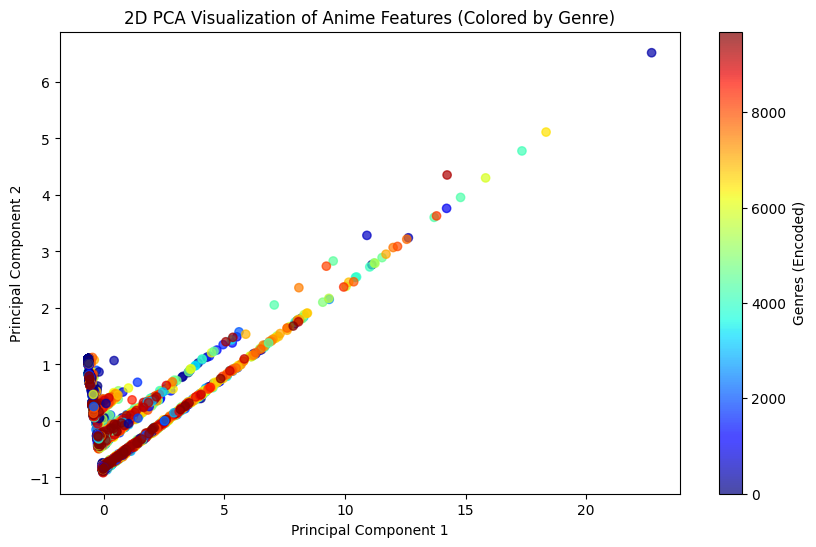

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Assign colors based on genres (Tags)
unique_tags = df['Tags'].unique()
color_map = {tag: i for i, tag in enumerate(unique_tags)}  # Assigning unique colors to each tag
colors = [color_map[tag] if tag in color_map else 0 for tag in df['Tags']]  # Map colors to anime

# Scatter plot with color mapping
plt.figure(figsize=(10, 6))
plt.scatter(features_2D[:, 0], features_2D[:, 1], c=colors, cmap='jet', alpha=0.7)
plt.colorbar(label="Genres (Encoded)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features (Colored by Genre)")
plt.show()



🔹 **Genre Encoding (Tag → Encoded Value)**
Comedy, Drama, Shounen, Sports, Tennis, Based on a Manga: 0
Drama, Mecha, Sci Fi, Conspiracy, Kaijuu, Loneliness, Melancholy, Military, Monsters, Post-apocalyptic, Psychological, Super Robot, Original Work: 1
Action, Comedy, Mecha, Sci Fi, Shounen, Military, Real Robot, Tsundere, Based on a Light Novel: 2
Idols, School Life, CG Animation: 3
Family Friendly: 4
Unknown: 5
Dancing: 6
Action, Adventure, Fantasy, Chinese Animation, Martial Arts, Short Episodes, Xianxia, Based on a Novel: 7
Animal Protagonists, Anthropomorphic, Non-Human Protagonists, Rabbits: 8
Animal Protagonists, Anthropomorphic, Birds, Commercials, Demons, Hell, Non-Human Protagonists, Promotional, Short Episodes: 9
Action, Comedy, Drama, Ecchi, Sci Fi, Shounen, Sports, Based on a Manga: 10
Comedy, Animal Protagonists, Anthropomorphic, Music, Non-Human Protagonists, Rock Music, Sanrio Characters, Short Episodes, Original Work: 11
Vocaloid: 12
Comedy, Romance, Shounen, Demons, H

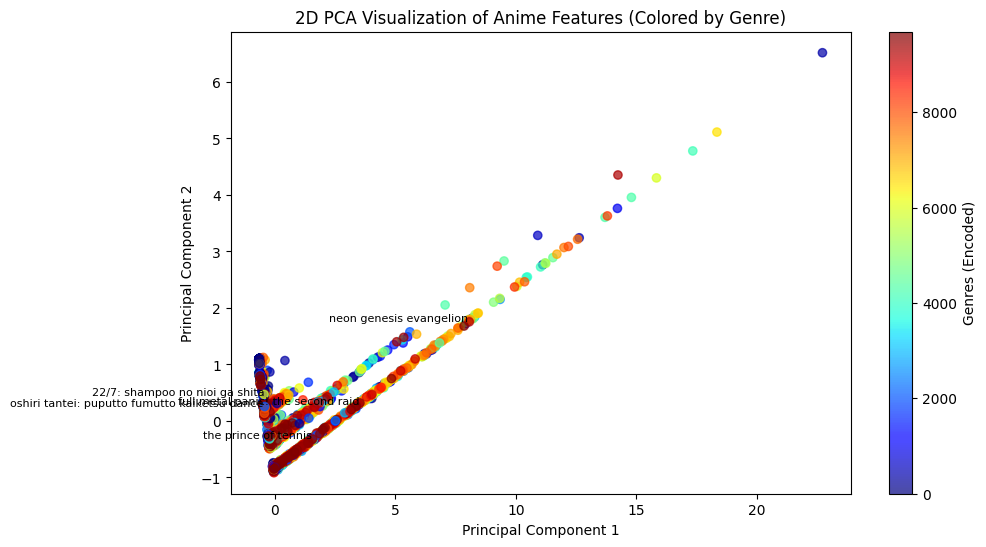

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Assign colors based on genres (Tags)
unique_tags = df['Tags'].unique()
color_map = {tag: i for i, tag in enumerate(unique_tags)}  # Assigning unique colors to each tag
colors = [color_map[tag] if tag in color_map else 0 for tag in df['Tags']]  # Map colors to anime

# Print encoding values in terminal
print("\n🔹 **Genre Encoding (Tag → Encoded Value)**")
for tag, value in color_map.items():
    print(f"{tag}: {value}")

# Scatter plot with color mapping
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_2D[:, 0], features_2D[:, 1], c=colors, cmap='jet', alpha=0.7)
plt.colorbar(label="Genres (Encoded)")

# Label first 5 animes as an example
for i in range(5):
    plt.text(features_2D[i, 0], features_2D[i, 1], df.loc[i, 'Name'], fontsize=8, ha='right', color='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features (Colored by Genre)")
plt.show()



🔹 **Genre Encoding (Tag → Encoded Value)**
15th Century: 0
16th Century: 1
17th Century: 2
18th Century: 3
19th Century: 4
Abstract: 5
Acting: 6
Action: 7
Adult Couples: 8
Adult Industry: 9
Adventure: 10
Africa: 11
Afterlife: 12
Age Gap: 13
Age Transformation: 14
Aging: 15
Agriculture: 16
Alcohol: 17
Alice in Wonderland: 18
Aliens: 19
All-Boys School: 20
All-Girls School: 21
America: 22
Amnesia: 23
Amusement Park: 24
Ancient China: 25
Androids: 26
Androphobia: 27
Angels: 28
Animal Characteristics: 29
Animal Protagonists: 30
Animal Transformation: 31
Anime Bancho: 32
Anime Industry: 33
Anime Tamago: 34
Anime no Chikara: 35
Anime no Me: 36
Animeism: 37
Anthropomorphic: 38
Apartment Life: 39
Apocalypse: 40
Apprenticeship: 41
Archery: 42
Arranged Marriage: 43
Art: 44
Art School: 45
Assassins: 46
Astronauts: 47
Astronomy: 48
Australia: 49
Autobiographies: 50
Aviation: 51
BDSM: 52
BL: 53
Badminton: 54
Baking: 55
Ballet Dancing: 56
Bar: 57
Baseball: 58
Based on a 4-Koma Manga: 59
Based on a 

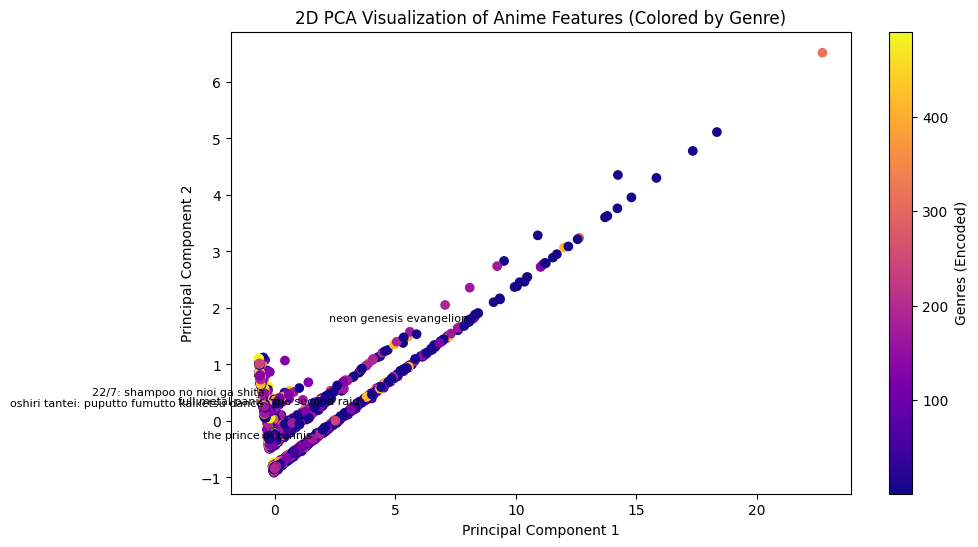

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Step 1: Split multi-genre tags
df['Tags'] = df['Tags'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])  # Convert comma-separated tags into lists

# Step 2: Flatten the tag list to create a unique mapping
all_tags = sorted(set(tag for tags in df['Tags'] for tag in tags))  # Get all unique genres
color_map = {tag: i for i, tag in enumerate(all_tags)}  # Assign unique colors

# Step 3: Assign a single genre per anime (choose first genre for simplicity)
df['Primary_Tag'] = df['Tags'].apply(lambda x: x[0] if x else 'Unknown')

# Step 4: Map colors to primary genres
colors = [color_map[tag] if tag in color_map else 0 for tag in df['Primary_Tag']]

# Step 5: Print genre encoding in terminal
print("\n🔹 **Genre Encoding (Tag → Encoded Value)**")
for tag, value in color_map.items():
    print(f"{tag}: {value}")

# Step 6: Perform PCA
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Step 7: Scatter plot with color mapping
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_2D[:, 0], features_2D[:, 1], c=colors, cmap='plasma')
plt.colorbar(label="Genres (Encoded)")

# Step 8: Label first 5 animes as an example
for i in range(5):
    plt.text(features_2D[i, 0], features_2D[i, 1], df.loc[i, 'Name'], fontsize=8, ha='right', color='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features (Colored by Genre)")
plt.show()



🔹 **Genre Encoding (Tag → Encoded Value)**


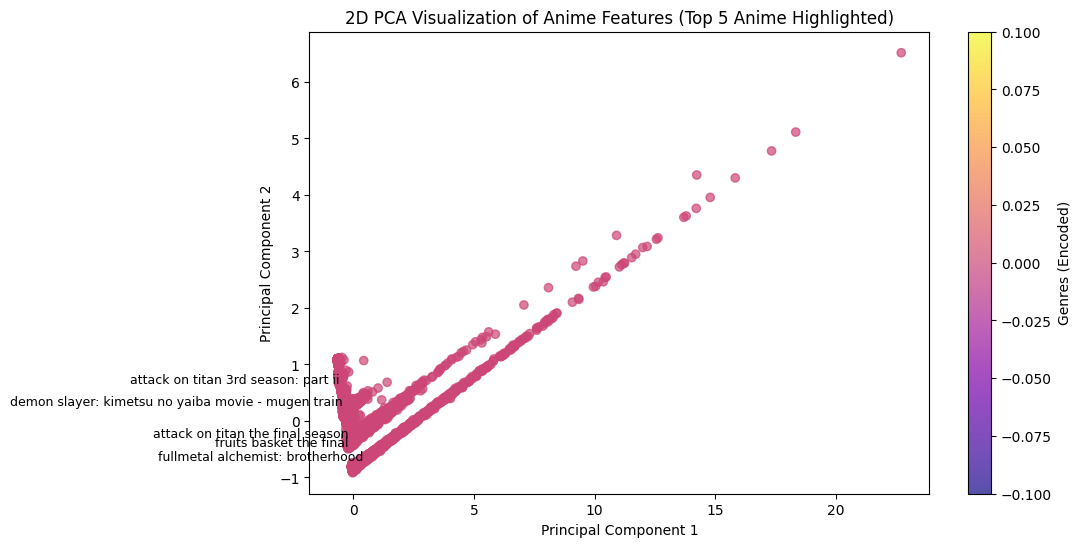

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Step 1: Split multi-genre tags
df['Tags'] = df['Tags'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])  # Convert comma-separated tags into lists

# Step 2: Flatten the tag list to create a unique mapping
all_tags = sorted(set(tag for tags in df['Tags'] for tag in tags))  # Get all unique genres
color_map = {tag: i for i, tag in enumerate(all_tags)}  # Assign unique colors

# Step 3: Assign a single genre per anime (choose first genre for simplicity)
df['Primary_Tag'] = df['Tags'].apply(lambda x: x[0] if x else 'Unknown')

# Step 4: Map colors to primary genres
colors = [color_map[tag] if tag in color_map else 0 for tag in df['Primary_Tag']]

# Step 5: Print genre encoding in terminal
print("\n🔹 **Genre Encoding (Tag → Encoded Value)**")
for tag, value in color_map.items():
    print(f"{tag}: {value}")

# Step 6: Perform PCA
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Step 7: Scatter plot with color mapping
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_2D[:, 0], features_2D[:, 1], c=colors, cmap='plasma', alpha=0.7)
plt.colorbar(label="Genres (Encoded)")

# Step 8: Label top 5 highest-rated anime
top_5_anime = df.nlargest(5, 'Rating Score')
for i in top_5_anime.index:
    plt.text(features_2D[i, 0], features_2D[i, 1], df.loc[i, 'Name'], fontsize=9, ha='right', color='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features (Top 5 Anime Highlighted)")
plt.show()



🔹 **Genre Encoding (Tag → Encoded Value)**

🔹 **Principal Component 1 (PC1) Values:**
[ 1.56793673  8.01288464  3.5138571  ... -0.60352221 -0.38863149
 -0.4161193 ]

🔹 **Principal Component 2 (PC2) Values:**
[-0.31447716  1.76945669  0.29264118 ...  0.79689652  0.23260402
  0.25542684]


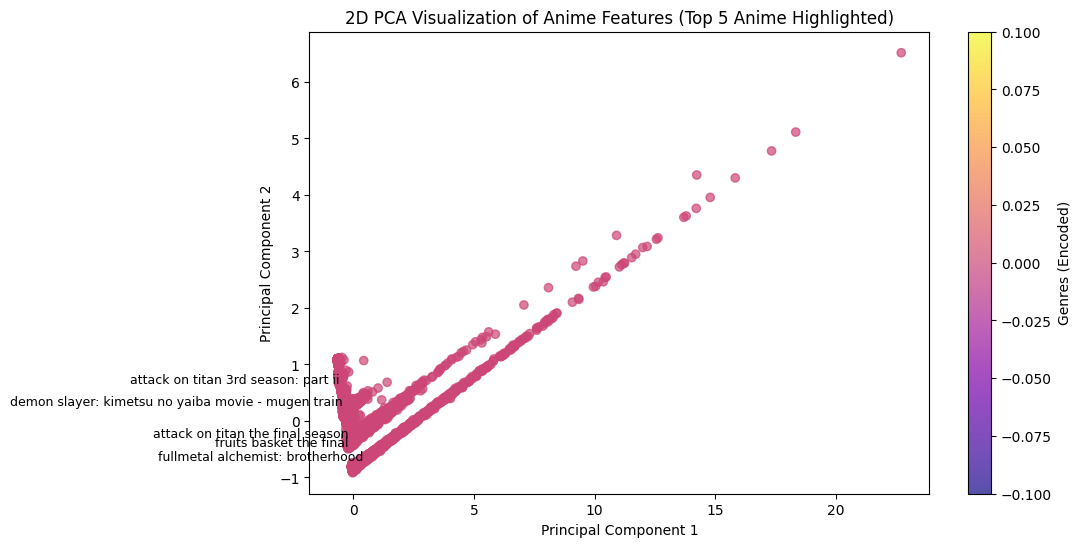

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Step 1: Split multi-genre tags
df['Tags'] = df['Tags'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])  # Convert comma-separated tags into lists

# Step 2: Flatten the tag list to create a unique mapping
all_tags = sorted(set(tag for tags in df['Tags'] for tag in tags))  # Get all unique genres
color_map = {tag: i for i, tag in enumerate(all_tags)}  # Assign unique colors

# Step 3: Assign a single genre per anime (choose first genre for simplicity)
df['Primary_Tag'] = df['Tags'].apply(lambda x: x[0] if x else 'Unknown')

# Step 4: Map colors to primary genres
colors = [color_map[tag] if tag in color_map else 0 for tag in df['Primary_Tag']]

# Step 5: Print genre encoding in terminal
print("\n🔹 **Genre Encoding (Tag → Encoded Value)**")
for tag, value in color_map.items():
    print(f"{tag}: {value}")

# Step 6: Perform PCA
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Extract PC1 and PC2
PC1 = features_2D[:, 0]  # First principal component
PC2 = features_2D[:, 1]  # Second principal component

# Print PC1 and PC2 values in terminal
print("\n🔹 **Principal Component 1 (PC1) Values:**")
print(PC1)

print("\n🔹 **Principal Component 2 (PC2) Values:**")
print(PC2)

# Step 7: Scatter plot with color mapping
plt.figure(figsize=(10, 6))
scatter = plt.scatter(PC1, PC2, c=colors, cmap='plasma', alpha=0.7)
plt.colorbar(label="Genres (Encoded)")

# Step 8: Label top 5 highest-rated anime
top_5_anime = df.nlargest(5, 'Rating Score')
for i in top_5_anime.index:
    plt.text(PC1[i], PC2[i], df.loc[i, 'Name'], fontsize=9, ha='right', color='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features (Top 5 Anime Highlighted)")
plt.show()


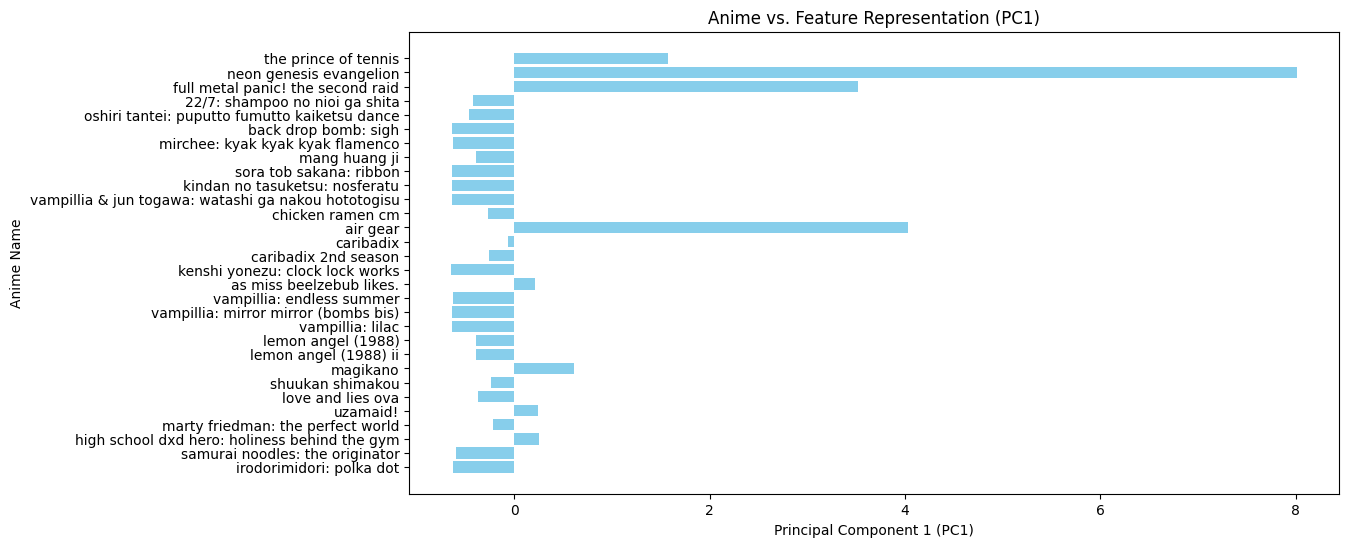

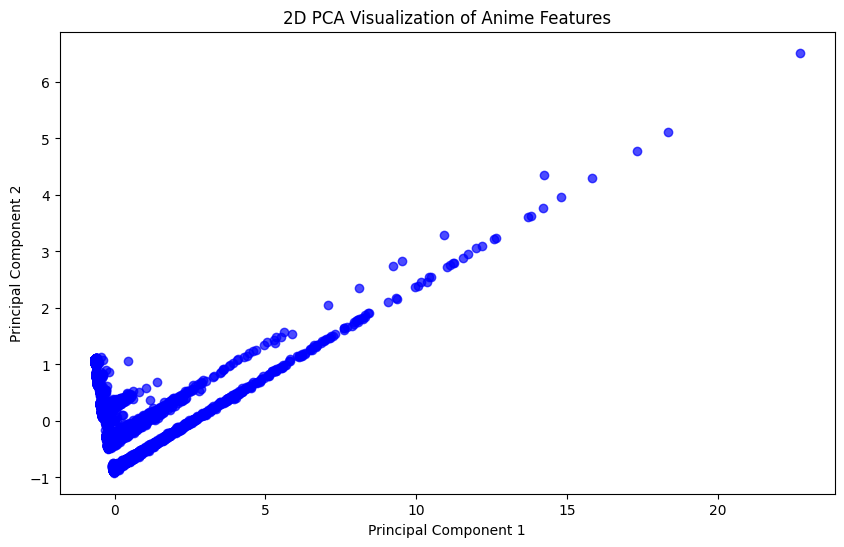

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Extract Principal Components
PC1 = features_2D[:, 0]  # First Principal Component
PC2 = features_2D[:, 1]  # Second Principal Component

# Get anime names
anime_names = df["Name"].values

# Plot Anime Name vs. PC1
plt.figure(figsize=(12, 6))
plt.barh(anime_names[:30], PC1[:30], color='skyblue')  # Plot first 30 anime for clarity
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Anime Name")
plt.title("Anime vs. Feature Representation (PC1)")
plt.gca().invert_yaxis()  # Invert for readability
plt.show()

# Scatter Plot of PC1 vs. PC2
plt.figure(figsize=(10, 6))
plt.scatter(PC1, PC2, alpha=0.7, c='blue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features")
plt.show()


C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


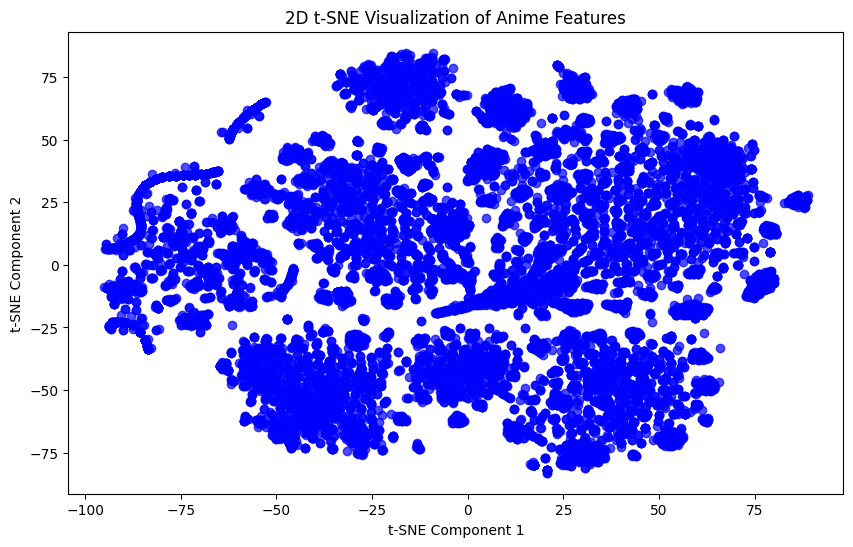

In [40]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2D = tsne.fit_transform(features_combined)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(features_2D[:, 0], features_2D[:, 1], alpha=0.7, c='blue')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("2D t-SNE Visualization of Anime Features")
plt.show()


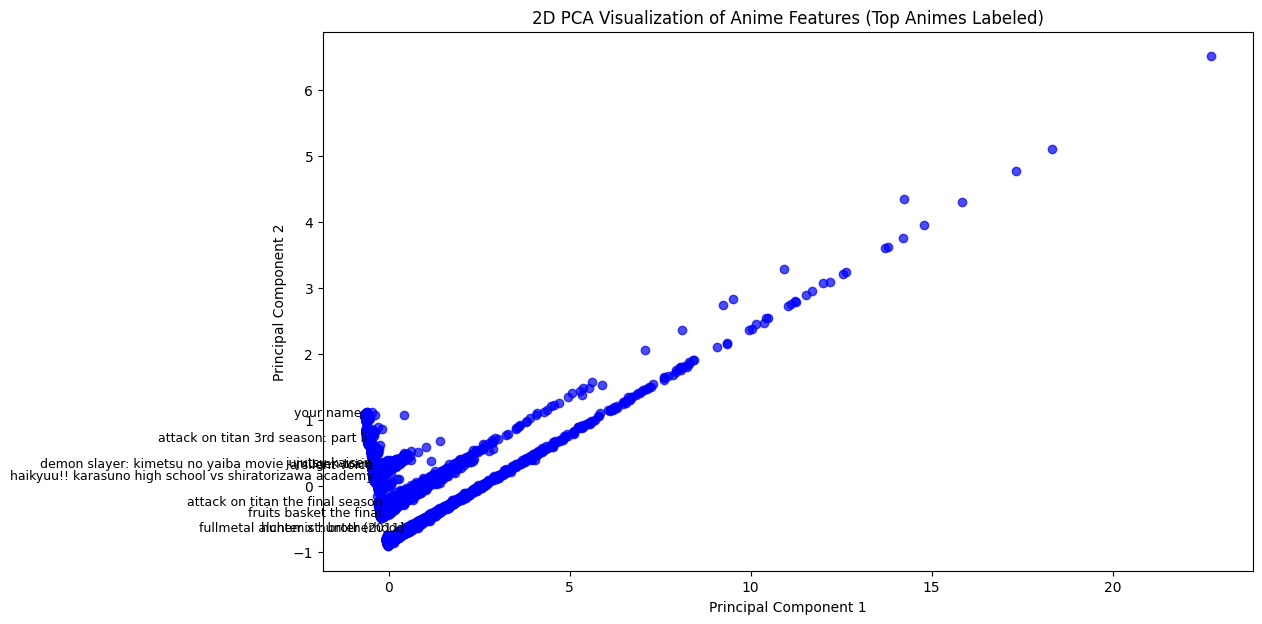

In [41]:
import matplotlib.pyplot as plt

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
features_2D = pca.fit_transform(features_combined)

# Define important animes (Top 10 by rating)
top_anime = df.nlargest(10, 'Rating Score')

# Scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(features_2D[:, 0], features_2D[:, 1], alpha=0.7, c='blue')

# Label top animes
for i, row in top_anime.iterrows():
    plt.text(features_2D[i, 0], features_2D[i, 1], row['Name'], fontsize=9, ha='right')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of Anime Features (Top Animes Labeled)")
plt.show()


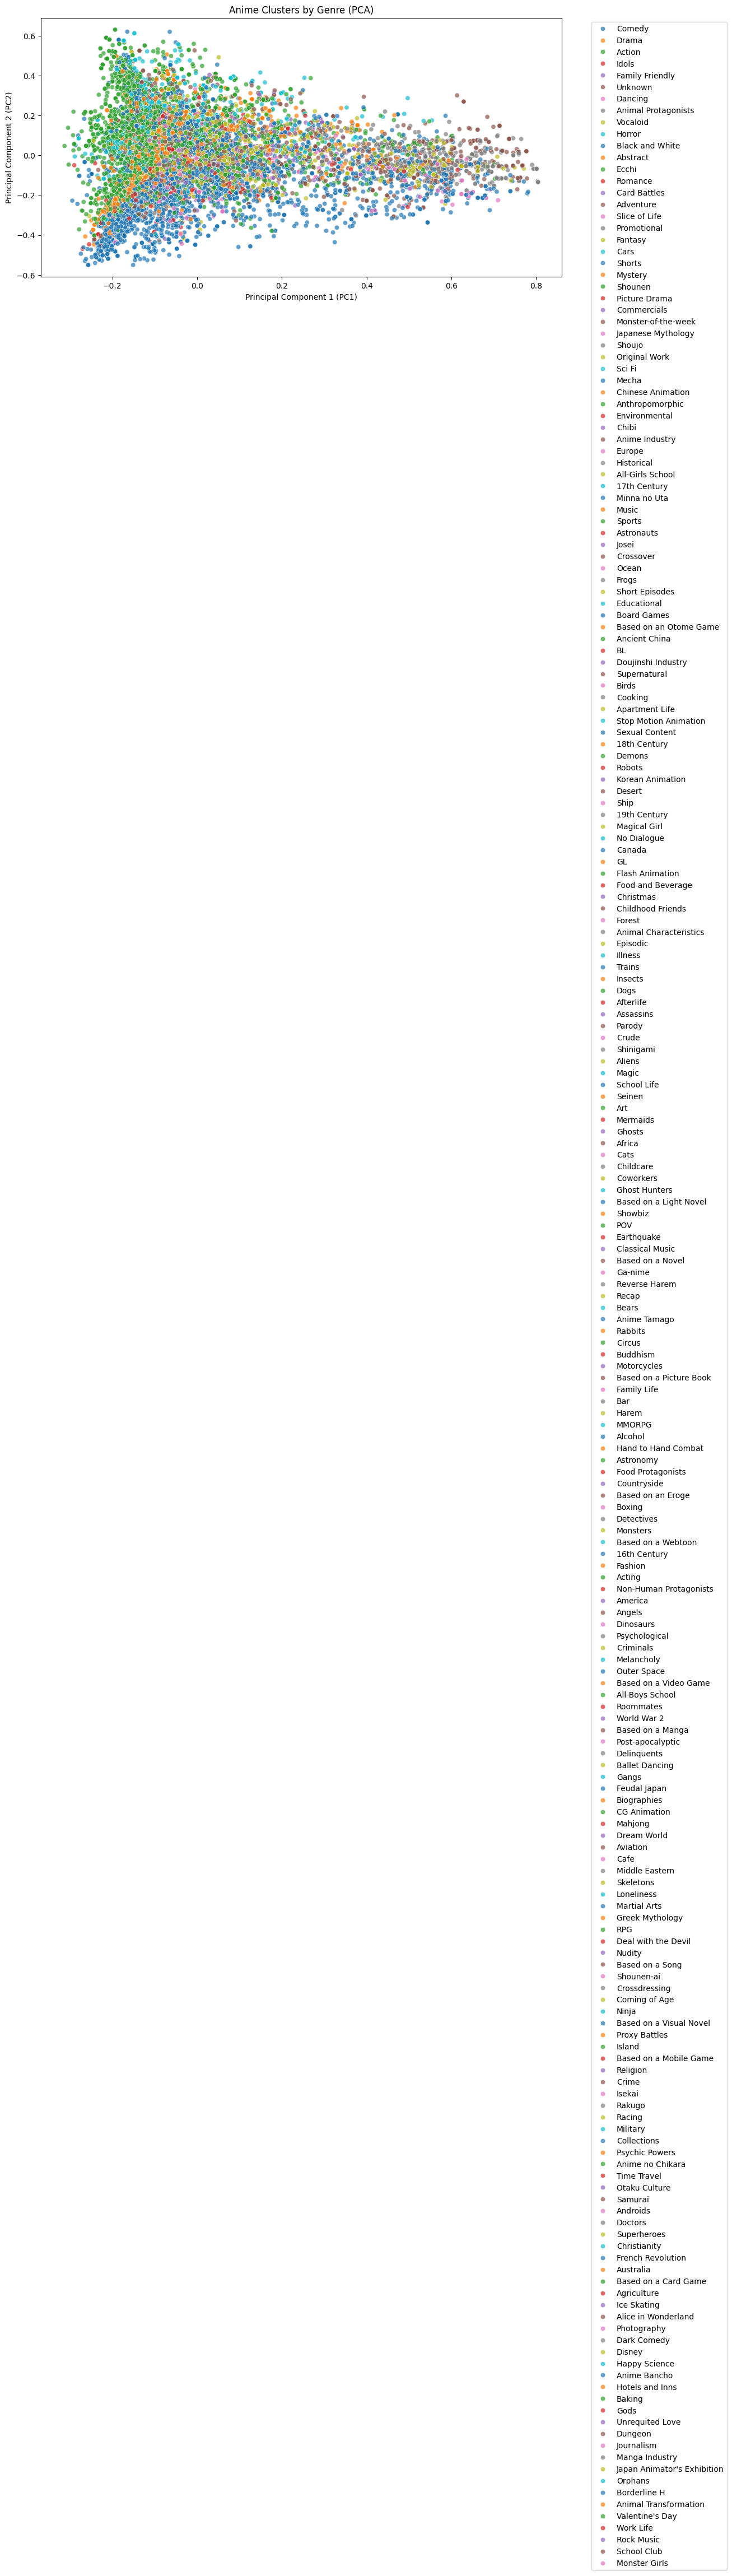

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv("..\\anime.csv")

# Fill NaN values
df['Tags'] = df['Tags'].fillna('')

# TF-IDF Vectorization for Tags
tag_vectorizer = TfidfVectorizer(stop_words='english', max_features=600)
tag_matrix = tag_vectorizer.fit_transform(df['Tags']).toarray()

# PCA to reduce features to 2D space
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tag_matrix)

# Convert PCA output to DataFrame
df_pca = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
df_pca['Anime Name'] = df['Name']
df_pca['Genre'] = df['Tags'].apply(lambda x: x.split(',')[0])  # Take the first genre tag

# Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Genre', palette='tab10', alpha=0.7)
plt.title("Anime Clusters by Genre (PCA)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [43]:
from sklearn.neighbors import NearestNeighbors

# Define KNN model
knn = NearestNeighbors(n_neighbors=12, metric='cosine')  # 6 includes Naruto itself
knn.fit(tag_matrix)

# Find Naruto's index
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]

# Get Naruto's nearest neighbors
distances, indices = knn.kneighbors(tag_matrix[anime1].reshape(1, -1))

# Print the top 5 most similar anime
print("Top 5 Anime Similar to Naruto:")
for i in indices[0][1:]:
    print(df.iloc[i]['Name'])


Top 5 Anime Similar to Naruto:
Naruto Movie 2: Legend of the Stone of Gelel
Naruto Movie 1: Ninja Clash in the Land of Snow
Naruto Special 2: Battle at Hidden Falls. I am the Hero!
Naruto Movie 3: Guardians of the Crescent Moon Kingdom
Boruto: Naruto the Movie
Naruto: Narutimate Hero 3 OVA
Naruto Shippuden Movie 2: Bonds
Naruto Shippuden Movie 1
Boruto: Jump Festa 2016 Special
Boruto: Naruto Next Generations
Naruto: Honoo no Chuunin Shiken! Naruto vs Konohamaru!!


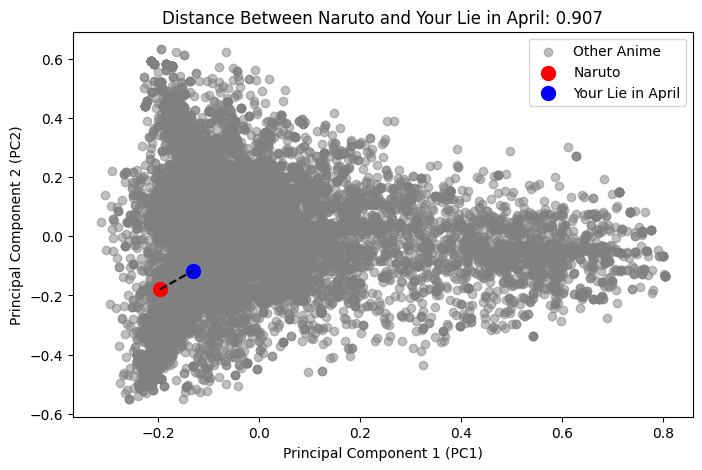

In [44]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

# Apply PCA to reduce tag features to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tag_matrix)

# Get indices of Naruto and Your Lie in April
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]
ylia_index = df[df["Name"].str.contains("Your Lie in April", case=False, na=False)].index[0]

# Compute distance using cosine similarity
distance = cosine_distances([tag_matrix[anime1]], [tag_matrix[ylia_index]])[0][0]

# Plot their placement on PCA space
plt.figure(figsize=(8, 5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5, label="Other Anime", color="gray")
plt.scatter(pca_features[anime1, 0], pca_features[anime1, 1], color='red', label="Naruto", s=100)
plt.scatter(pca_features[ylia_index, 0], pca_features[ylia_index, 1], color='blue', label="Your Lie in April", s=100)

# Draw line between them
plt.plot([pca_features[anime1, 0], pca_features[ylia_index, 0]], 
         [pca_features[anime1, 1], pca_features[ylia_index, 1]], 
         color='black', linestyle="dashed", linewidth=1.5)

# Labels & title
plt.title(f"Distance Between Naruto and Your Lie in April: {distance:.3f}")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend()
plt.show()


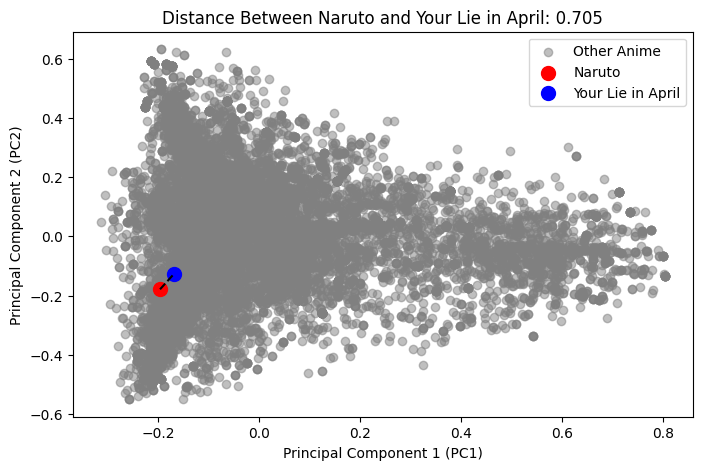

In [45]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

# Apply PCA to reduce tag features to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tag_matrix)

# Get indices of Naruto and Your Lie in April
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]
ylia_index = df[df["Name"].str.contains("bleach", case=False, na=False)].index[0]

# Compute distance using cosine similarity
distance = cosine_distances([tag_matrix[anime1]], [tag_matrix[ylia_index]])[0][0]

# Plot their placement on PCA space
plt.figure(figsize=(8, 5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5, label="Other Anime", color="gray")
plt.scatter(pca_features[anime1, 0], pca_features[anime1, 1], color='red', label="Naruto", s=100)
plt.scatter(pca_features[ylia_index, 0], pca_features[ylia_index, 1], color='blue', label="Your Lie in April", s=100)

# Draw line between them
plt.plot([pca_features[anime1, 0], pca_features[ylia_index, 0]], 
         [pca_features[anime1, 1], pca_features[ylia_index, 1]], 
         color='black', linestyle="dashed", linewidth=1.5)

# Labels & title
plt.title(f"Distance Between Naruto and Your Lie in April: {distance:.3f}")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend()
plt.show()



🔹 Cosine Distances from Naruto to Bottom 10 Anime:
Platinum End: 0.896
Shima Shima Tora no Shimajirou no Shouboutai: 1.000
Ninja Box 3rd Season: 0.492
Her: 1.000
Beginning: 1.000
Aria the Crepuscolo: 0.784
Chuck Shimezou: 1.000
Captain Bal: 1.000
Restaurant to Another World 2: 0.973
Ekubo Ouji: 1.000


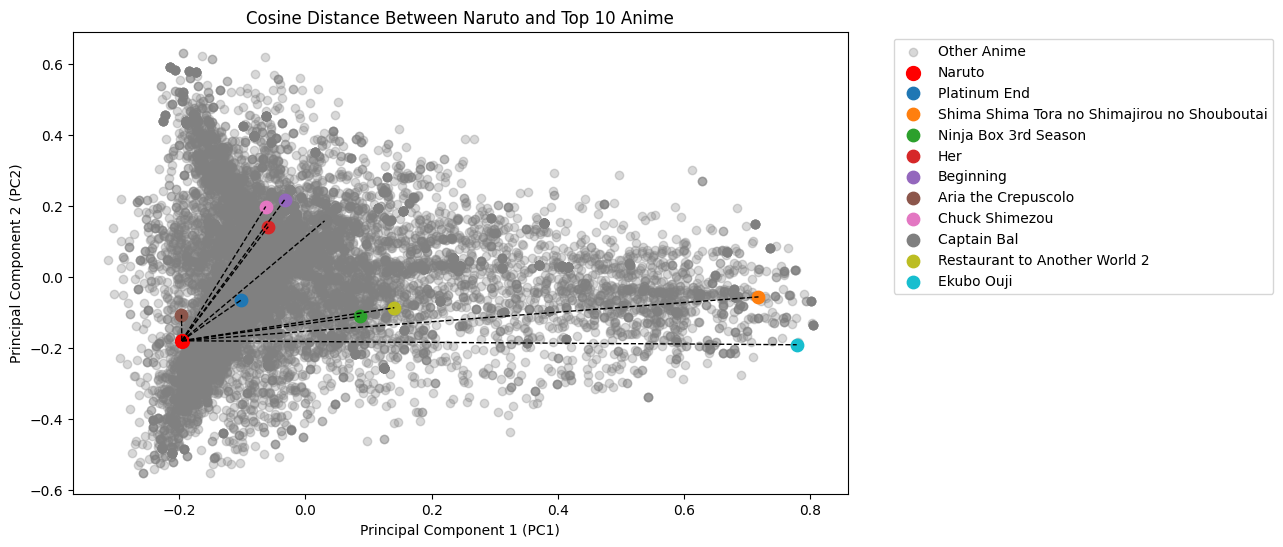

In [46]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Sort anime by Rating Score (descending order)
top_10_anime = df.sort_values(by="Rating Score", ascending=False).head(10)

# ✅ Apply PCA to reduce tag features to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tag_matrix)

# ✅ Get index of Naruto
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]

# ✅ Compute distances between Naruto and each of the top 10 anime
distances = {}
for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    dist = cosine_distances([tag_matrix[anime1]], [tag_matrix[anime_index]])[0][0]
    distances[anime_name] = dist

# ✅ Print distances
print("\n🔹 Cosine Distances from Naruto to Bottom 10 Anime:")
for anime, dist in distances.items():
    print(f"{anime}: {dist:.3f}")

# ✅ Plot Naruto and the top 10 anime
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.3, label="Other Anime", color="gray")

# ✅ Highlight Naruto
plt.scatter(pca_features[anime1, 0], pca_features[anime1, 1], color='red', label="Naruto", s=100)

# ✅ Highlight top 10 anime
for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    plt.scatter(pca_features[anime_index, 0], pca_features[anime_index, 1], label=anime_name, s=80)

    # ✅ Draw dashed line from Naruto to each top anime
    plt.plot([pca_features[anime1, 0], pca_features[anime_index, 0]], 
             [pca_features[anime1, 1], pca_features[anime_index, 1]], 
             color='black', linestyle="dashed", linewidth=1)

# ✅ Labels & title
plt.title("Cosine Distance Between Naruto and Top 10 Anime")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



🔹 Cosine Distances from Naruto to Top 10 Anime:
Hunter x Hunter (2011): 0.667
Jujutsu Kaisen: 0.738
Attack on Titan The Final Season: 0.752
Gintama Kanketsu-hen: Yorozuya yo Eien Nare: 0.799
Fullmetal Alchemist: Brotherhood: 0.803
Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train: 0.805
Demon Slayer: Kimetsu no Yaiba: 0.826
Attack on Titan 3rd Season: Part II: 0.833
Gintama (2015): 0.846
Mob Psycho 100 II: 0.864


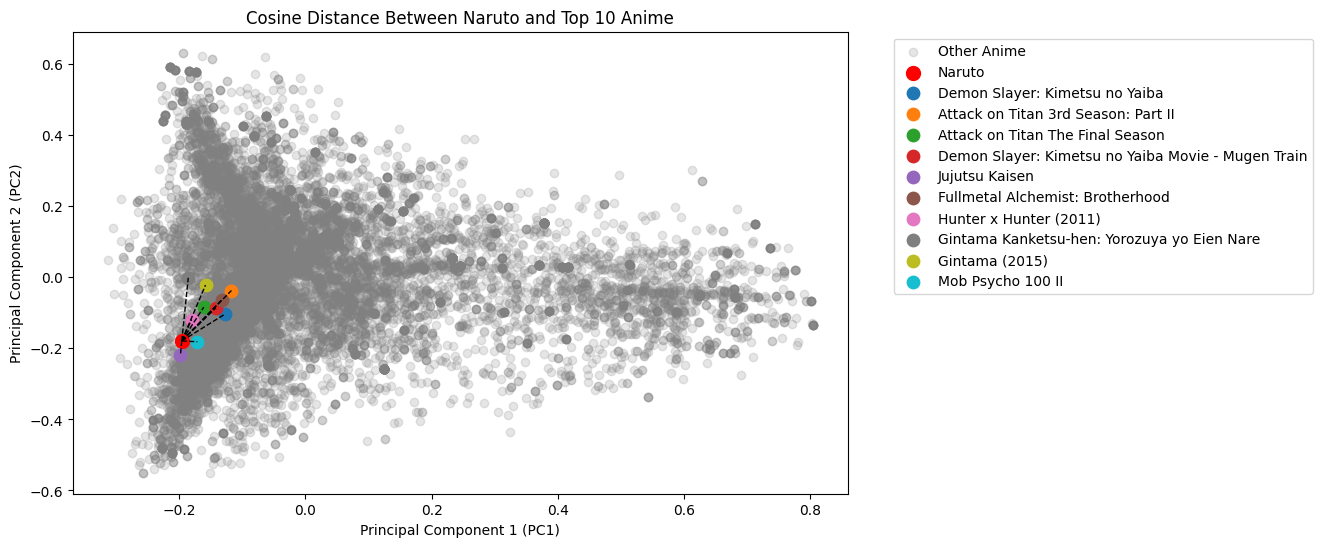

In [47]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Define the top 10 anime manually
top_10_anime_names = [
    "Fullmetal Alchemist: Brotherhood",
    "Attack on Titan The Final Season",
    "Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train",
    "Attack on Titan 3rd Season: Part II",
    "Jujutsu Kaisen",
    "Hunter x Hunter (2011)",
    "Demon Slayer: Kimetsu no Yaiba",
    "Gintama Kanketsu-hen: Yorozuya yo Eien Nare",
    "Gintama (2015)",
    "Mob Psycho 100 II"
]

# ✅ Filter dataset for these anime
top_10_anime = df[df["Name"].isin(top_10_anime_names)]

# ✅ Apply PCA to reduce tag features to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tag_matrix)

# ✅ Get Naruto's index
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]

# ✅ Compute cosine distances from Naruto to each top 10 anime
distances = {}
for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    dist = cosine_distances([tag_matrix[anime1]], [tag_matrix[anime_index]])[0][0]
    distances[anime_name] = dist

# ✅ Print sorted distances
print("\n🔹 Cosine Distances from Naruto to Top 10 Anime:")
for anime, dist in sorted(distances.items(), key=lambda x: x[1]):
    print(f"{anime}: {dist:.3f}")

# ✅ Plot Naruto and the top 10 anime in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.2, label="Other Anime", color="gray")

# ✅ Highlight Naruto
plt.scatter(pca_features[anime1, 0], pca_features[anime1, 1], color='red', label="Naruto", s=100)

# ✅ Highlight each of the top 10 anime
for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    plt.scatter(pca_features[anime_index, 0], pca_features[anime_index, 1], label=anime_name, s=80)

    # ✅ Draw dashed lines from Naruto to each anime
    plt.plot([pca_features[anime1, 0], pca_features[anime_index, 0]], 
             [pca_features[anime1, 1], pca_features[anime_index, 1]], 
             color='black', linestyle="dashed", linewidth=1)

# ✅ Labels & title
plt.title("Cosine Distance Between Naruto and Top 10 Anime")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



🔹 Cosine Distances from Naruto to Top 10 Anime:
Hunter x Hunter (2011): 0.667
Jujutsu Kaisen: 0.738
Attack on Titan The Final Season: 0.752
Gintama Kanketsu-hen: Yorozuya yo Eien Nare: 0.799
Fullmetal Alchemist: Brotherhood: 0.803
Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train: 0.805
Demon Slayer: Kimetsu no Yaiba: 0.826
Attack on Titan 3rd Season: Part II: 0.833
Gintama (2015): 0.846
Mob Psycho 100 II: 0.864


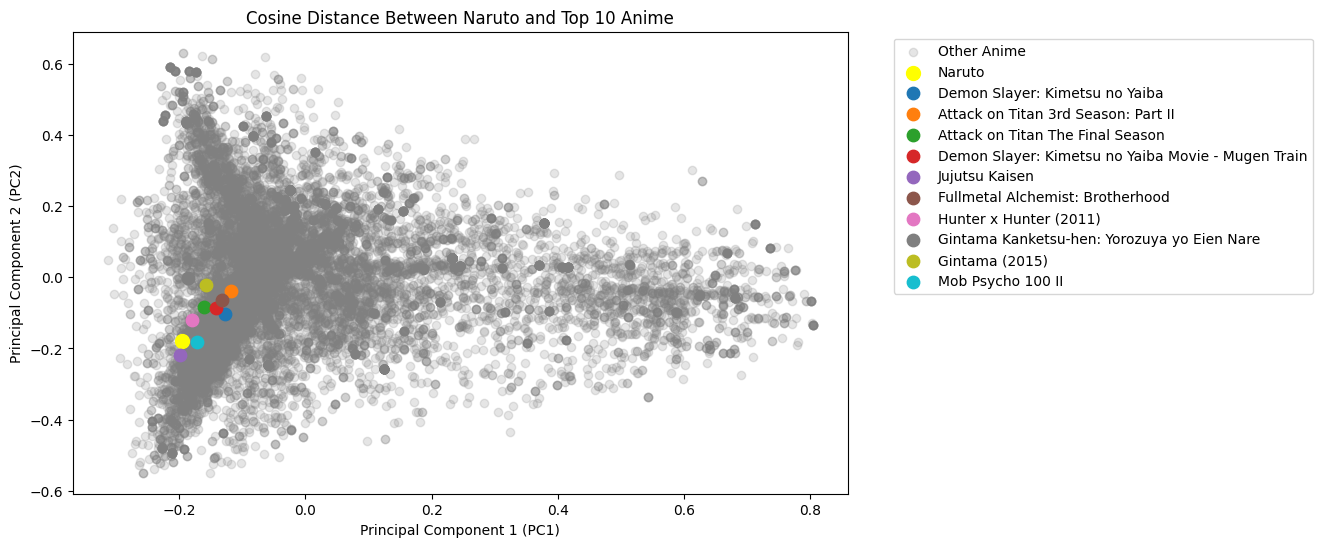

In [48]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Define the top 10 anime manually
top_10_anime_names = [
    "Fullmetal Alchemist: Brotherhood",
    "Attack on Titan The Final Season",
    "Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train",
    "Attack on Titan 3rd Season: Part II",
    "Jujutsu Kaisen",
    "Hunter x Hunter (2011)",
    "Demon Slayer: Kimetsu no Yaiba",
    "Gintama Kanketsu-hen: Yorozuya yo Eien Nare",
    "Gintama (2015)",
    "Mob Psycho 100 II"
]

# ✅ Filter dataset for these anime
top_10_anime = df[df["Name"].isin(top_10_anime_names)]

# ✅ Apply PCA to reduce tag features to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tag_matrix)

# ✅ Get Naruto's index
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]

# ✅ Compute cosine distances from Naruto to each top 10 anime
distances = {}
for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    dist = cosine_distances([tag_matrix[anime1]], [tag_matrix[anime_index]])[0][0]
    distances[anime_name] = dist

# ✅ Print sorted distances
print("\n🔹 Cosine Distances from Naruto to Top 10 Anime:")
for anime, dist in sorted(distances.items(), key=lambda x: x[1]):
    print(f"{anime}: {dist:.3f}")

# ✅ Plot Naruto and the top 10 anime in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.2, label="Other Anime", color="gray")

# ✅ Highlight Naruto
plt.scatter(pca_features[anime1, 0], pca_features[anime1, 1], color='yellow', label="Naruto", s=100)

# ✅ Highlight each of the top 10 anime
for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    plt.scatter(pca_features[anime_index, 0], pca_features[anime_index, 1], label=anime_name, s=80)

    # ✅ Draw dashed lines from Naruto to each anime
    plt.plot([pca_features[anime1, 0], pca_features[anime_index, 0]], 
             [pca_features[anime1, 1], pca_features[anime_index, 1]], 
             color='black', linestyle="dashed", linewidth=0)

# ✅ Labels & title
plt.title("Cosine Distance Between Naruto and Top 10 Anime")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



🔹 Cosine Distances from Naruto to Top 10 Anime:
Hunter x Hunter (2011): 0.667
Jujutsu Kaisen: 0.738
Attack on Titan The Final Season: 0.752
Gintama Kanketsu-hen: Yorozuya yo Eien Nare: 0.799
Fullmetal Alchemist: Brotherhood: 0.803
Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train: 0.805
Demon Slayer: Kimetsu no Yaiba: 0.826
Attack on Titan 3rd Season: Part II: 0.833
Gintama (2015): 0.846
Mob Psycho 100 II: 0.864


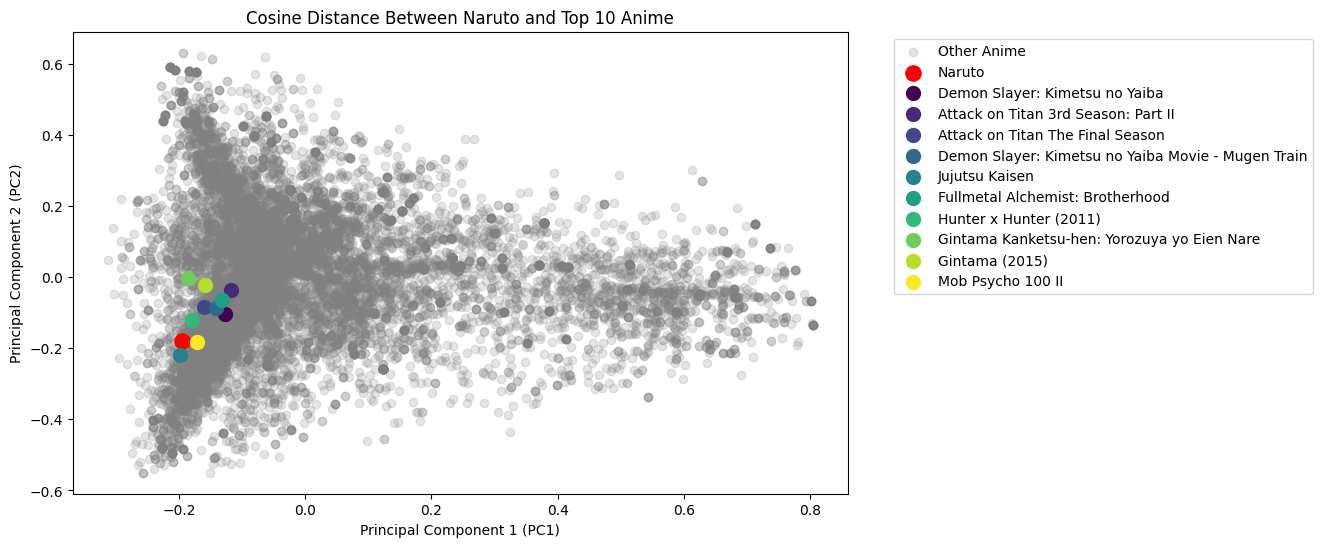

In [49]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ✅ Define the top 10 anime manually
top_10_anime_names = [
    "Fullmetal Alchemist: Brotherhood",
    "Attack on Titan The Final Season",
    "Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train",
    "Attack on Titan 3rd Season: Part II",
    "Jujutsu Kaisen",
    "Hunter x Hunter (2011)",
    "Demon Slayer: Kimetsu no Yaiba",
    "Gintama Kanketsu-hen: Yorozuya yo Eien Nare",
    "Gintama (2015)",
    "Mob Psycho 100 II"
]

# ✅ Filter dataset for these anime
top_10_anime = df[df["Name"].isin(top_10_anime_names)]

# ✅ Apply PCA to reduce tag features to 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tag_matrix)

# ✅ Get Naruto's index
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]

# ✅ Compute cosine distances from Naruto to each top 10 anime
distances = {}
for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    dist = cosine_distances([tag_matrix[anime1]], [tag_matrix[anime_index]])[0][0]
    distances[anime_name] = dist

# ✅ Print sorted distances
print("\n🔹 Cosine Distances from Naruto to Top 10 Anime:")
for anime, dist in sorted(distances.items(), key=lambda x: x[1]):
    print(f"{anime}: {dist:.3f}")

# ✅ Assign colors using a colormap (choose 'plasma' or 'viridis')
cmap = plt.get_cmap("viridis")  # Change to "viridis" for a different theme
colors = cmap(np.linspace(0, 1, len(top_10_anime)))

# ✅ Plot Naruto and the top 10 anime in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.2, label="Other Anime", color="gray")

# ✅ Highlight Naruto in yellow
plt.scatter(pca_features[anime1, 0], pca_features[anime1, 1], color='red', label="Naruto", s=120)
# plt.scatter(pca_features[anime1, 0], pca_features[anime1, 1], color='red', label="Naruto", s=120, edgecolors="black")

# ✅ Highlight each of the top 10 anime with the color gradient
for i, (anime_name, color) in enumerate(zip(top_10_anime["Name"], colors)):
    anime_index = df[df["Name"] == anime_name].index[0]
    plt.scatter(pca_features[anime_index, 0], pca_features[anime_index, 1], label=anime_name, s=100, color=color)   # plt.scatter(pca_features[anime_index, 0], pca_features[anime_index, 1], label=anime_name, s=100, color=color, edgecolors="black")

    # ✅ Draw dashed lines from Naruto to each anime
    plt.plot([pca_features[anime1, 0], pca_features[anime_index, 0]], 
             [pca_features[anime1, 1], pca_features[anime_index, 1]], 
             color='black', linestyle="dashed", linewidth=0)

# ✅ Labels & title
plt.title("Cosine Distance Between Naruto and Top 10 Anime")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [50]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import euclidean, cityblock, hamming, jaccard
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Define the top 10 anime manually
top_10_anime_names = [
    "Fullmetal Alchemist: Brotherhood",
    "Attack on Titan The Final Season",
    "Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train",
    "Attack on Titan 3rd Season: Part II",
    "Jujutsu Kaisen",
    "Hunter x Hunter (2011)",
    "Demon Slayer: Kimetsu no Yaiba",
    "Gintama Kanketsu-hen: Yorozuya yo Eien Nare",
    "Gintama (2015)",
    "Mob Psycho 100 II"
]

# ✅ Filter dataset for these anime
top_10_anime = df[df["Name"].isin(top_10_anime_names)]

# ✅ Get Naruto's index and feature vector
anime1 = df[df["Name"].str.contains("Naruto", case=False, na=False)].index[0]
naruto_vector = tag_matrix[anime1]

# ✅ Store distances
distances = []

for anime_name in top_10_anime["Name"]:
    anime_index = df[df["Name"] == anime_name].index[0]
    anime_vector = tag_matrix[anime_index]

    # ✅ Compute different distances
    euclidean_dist = euclidean(naruto_vector, anime_vector)
    manhattan_dist = cityblock(naruto_vector, anime_vector)
    hamming_dist = hamming(naruto_vector, anime_vector)
    jaccard_dist = jaccard(naruto_vector, anime_vector)
    cosine_dist = cosine_distances([naruto_vector], [anime_vector])[0][0]

    # ✅ Store results
    distances.append([anime_name, euclidean_dist, manhattan_dist, hamming_dist, jaccard_dist, cosine_dist])

# ✅ Print distances in a table format
print("\n🔹 Distances Between Naruto and Top 10 Anime:\n")
print(f"{'Anime Name':<50} {'Euclidean':<12} {'Manhattan':<12} {'Hamming':<12} {'Jaccard':<12} {'Cosine':<12}")
print("=" * 90)
for row in distances:
    print(f"{row[0]:<50} {row[1]:<12.3f} {row[2]:<12.3f} {row[3]:<12.3f} {row[4]:<12.3f} {row[5]:<12.3f}")




🔹 Distances Between Naruto and Top 10 Anime:

Anime Name                                         Euclidean    Manhattan    Hamming      Jaccard      Cosine      
Demon Slayer: Kimetsu no Yaiba                     1.285        4.824        0.030        0.778        0.826       
Attack on Titan 3rd Season: Part II                1.290        4.531        0.025        0.733        0.833       
Attack on Titan The Final Season                   1.226        3.511        0.018        0.636        0.752       
Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train 1.269        4.379        0.025        0.733        0.805       
Jujutsu Kaisen                                     1.215        3.389        0.018        0.636        0.738       
Fullmetal Alchemist: Brotherhood                   1.268        4.160        0.023        0.714        0.803       
Hunter x Hunter (2011)                             1.155        2.896        0.017        0.600        0.667       
Gintama Kanketsu-hen: Yor

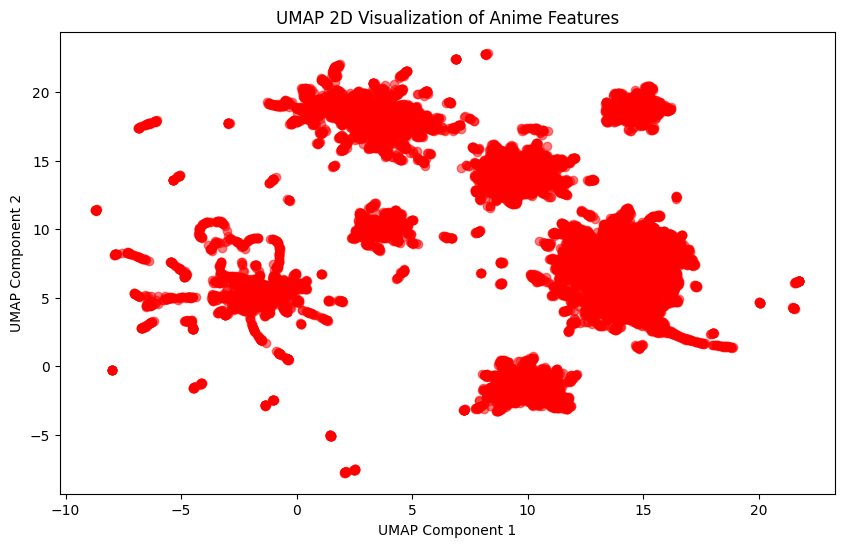

In [51]:


import umap

# Reduce dimensions to 2D
reducer = umap.UMAP(n_neighbors=10, min_dist=0.3, metric='euclidean')
features_2D_umap = reducer.fit_transform(features_combined)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(features_2D_umap[:, 0], features_2D_umap[:, 1], alpha=0.5, c='red')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP 2D Visualization of Anime Features")
plt.show()
